In [15]:
import geopandas as gpd
import pandas as pd
import numpy as np
import contextily as cx
from matplotlib import pyplot as plt

In [16]:
import ee

service_account_file = 'geocodelabs-jairo-7fde79c2873c.json'

# ID do projeto do Google Cloud Platform
project_id = 'geocodelabs-jairo'

# Inicializar a API do Earth Engine com a conta de serviço
credentials = ee.ServiceAccountCredentials(email=None, key_file=service_account_file)
ee.Initialize(credentials=credentials, project=project_id)

In [17]:
data = pd.read_csv('mestrado_araticum.csv')
gdf = gpd.read_file('result.gpkg')

In [18]:
#gdf[gdf['index'] == 0].plot()
rows = []
for i in gdf['index'].unique():
    tmp = data[data['index'] == i].copy()
    total = data[(data['index'] == i) & (data['class_year'] == 1985)]['class_area_ha'].sum()
    
    tmp['class_por'] = tmp['class_area_ha'] * 100 / total
    rows.append(tmp)
    
    
    
    

In [19]:
df = pd.concat(rows)
df

system:index      AreaHa    Categoria   DataConcl   DataInici  \
0           0_0_0    0.995280  restauracao  31/05/2021  31/01/2021   
1           0_1_0    0.995280  restauracao  31/05/2021  31/01/2021   
2           0_1_1    0.995280  restauracao  31/05/2021  31/01/2021   
3           0_2_0    0.995280  restauracao  31/05/2021  31/01/2021   
4           0_2_1    0.995280  restauracao  31/05/2021  31/01/2021   
...           ...         ...          ...         ...         ...   
2317      21_37_4  154.104993  restauracao     03-2023     04-2022   
2318      21_38_0  154.104993  restauracao     03-2023     04-2022   
2319      21_38_1  154.104993  restauracao     03-2023     04-2022   
2320      21_38_2  154.104993  restauracao     03-2023     04-2022   
2321      21_38_3  154.104993  restauracao     03-2023     04-2022   

                   Fonte                                          InstExecu  \
0     Cooperagrofamiliar  Cooperativa Agropecuária dos Produtores Famili...   
1     Cooperagrofamiliar  Cooperativa Agropecuária dos Produtores Famili...   
2     Cooperagrofamiliar  Cooperativa Agropecuária dos Produtores Famili...   
3     Cooperagrofamiliar  Cooperativa Agropecuária dos Produtores Famili...   
4     Cooperagrofamiliar  Cooperativa Agropecuária dos Produtores Famili...   
...                  ...                                                ...   
2317                 IRE     IRÉ/BRASIL - Instituto de Reflorestamento Éden   
2318                 IRE     IRÉ/BRASIL - Instituto de Reflorestamento Éden   
2319                 IRE     IRÉ/BRASIL - Instituto de Reflorestamento Éden   
2320                 IRE     IRÉ/BRASIL - Instituto de Reflorestamento Éden   
2321                 IRE     IRÉ/BRASIL - Instituto de Reflorestamento Éden   

     InstFinan          InstGest           MetComb  ... Privacidad ProjAtivo  \
0     CEPF/IEB  Não identificado  Não identificado  ...    publico       nao   
1     CEPF/IEB  Não identificado  Não identificado  ...    publico       nao   
2     CEPF/IEB  Não identificado  Não identificado  ...    publico       nao   
3     CEPF/IEB  Não identificado  Não identificado  ...    publico       nao   
4     CEPF/IEB  Não identificado  Não identificado  ...    publico       nao   
...        ...               ...               ...  ...        ...       ...   
2317      Eden  Não identificado  Não identificado  ...    publico       nao   
2318      Eden  Não identificado  Não identificado  ...    publico       nao   
2319      Eden  Não identificado  Não identificado  ...    publico       nao   
2320      Eden  Não identificado  Não identificado  ...    publico       nao   
2321      Eden  Não identificado  Não identificado  ...    publico       nao   

     Projeto TipoArea class_area_ha class_id class_year index  \
0        sim   outros      0.994303        7       1985     0   
1        sim   outros      0.161303        2       1986     0   
2        sim   outros      0.833000        7       1986     0   
3        sim   outros      0.161303        2       1987     0   
4        sim   outros      0.655058        4       1987     0   
...      ...      ...           ...      ...        ...   ...   
2317     nao   outros     17.591565       15       2022    21   
2318     nao   outros     15.562877        2       2023    21   
2319     nao   outros      1.765298        4       2023    21   
2320     nao   outros    119.051574        7       2023    21   
2321     nao   outros     17.699434       15       2023    21   

                                        .geo   class_por  
0     {"type":"MultiPoint","coordinates":[]}  100.000000  
1     {"type":"MultiPoint","coordinates":[]}   16.222704  
2     {"type":"MultiPoint","coordinates":[]}   83.777296  
3     {"type":"MultiPoint","coordinates":[]}   16.222704  
4     {"type":"MultiPoint","coordinates":[]}   65.881129  
...                                      ...         ...  
2317  {"type":"MultiPoint","coordinates":[]}   11.417223  
2

In [20]:
def get_color(x):
    return [
'#EDDE8E', # 1 PASTURE
'#32A65E', # 2 FOREST FORMATION
'#E974ED', # 3 AGRICULTURE
'#FFFFB2', # 4 AGROPEC
'#7A5900', # 5 FOREST PLANT
'#D4271E', # 6 URBAN
'#7DC975', # 7 SAVANNA
'#0000FF', # 8 WATER
'#026975', # 9 FLOODED AREA
'#02D659', # 10 WOODED SANDBANK
'#D6BC74', # 11 GRASSLAND
'#D68FE2', # 12 COFF
'#04381D', # 13 MANGROVE
'#9C0027', # 14 MINING
'#FFAA5F', # 15 ROCKY
'#AD975A', # 16 NON FOREST
'#FC8114', # 17 APICUM
'#AD5100', # 18 HERBACEOUS SANDBANK
'#CECECE', # 19 ASPHALT
  ][x-1]


def get_name(x):
    return [
'PASTURE',
'FOREST FORMATION',
'AGRICULTURE',
'AGROPEC',
'FOREST PLANT',
'URBAN',
'SAVANNA',
'WATER',
'FLOODED AREA',
    'WOODED SANDBANK',
    'GRASSLAND',
    'COFF',
    'MANGROVE',
    'MINING',
    'ROCKY',
    'NON FOREST',
    'APICUM',
    'HERBACEOUS SANDBANK',
    'ASPHALT',
  ][x-1]


def get_class_info(class_id):
    class_info = {
        1: ("#EDDE8E", "Pasture", 2),
        2: ("#32A65E", "Forest Formation",1),
        3: ("#E974ED", "Agriculture",2),
        4: ("#FFFFB2", "Agropec",2),
        5: ("#7A5900", "Forest Plant",2),
        6: ("#D4271E", "Urban",2),
        7: ("#7DC975", "Savanna",1),
        8: ("#0000FF", "Water",1),
        9: ("#026975", "Flooded Area",1),
        10: ("#02D659", "Wooded Sandbank",1),
        11: ("#D6BC74", "Grassland",1),
        12: ("#D68FE2", "Coff",2),
        13: ("#04381D", "Mangrove",1),
        14: ("#9C0027", "Mining",2),
        15: ("#FFAA5F", "Rocky",2),
        16: ("#AD975A", "Non Forest",2),
        17: ("#FC8114", "Apicum",1),
        18: ("#AD5100", "Herbaceous Sandbank",1),
        19: ("#CECECE", "Asphalt",2),
    }
    return class_info.get(class_id, ("#000000", "Unknown")) 

In [21]:
def get_year(x):
    if x is None:
        return 2021
    if isinstance(x,float):
        if np.isnan(x):
            return 2021
    if isinstance(x,str):
        if '-' in x:
            return x.split('-')[-1]
        if '/' in x:
            return x.split('/')[-1]
    return x

In [22]:
from shapely.geometry import Point

def distancia_maxima_centroide(gdf):
    """
    Calcula a distância máxima entre o centroide de um GeoDataFrame
    e os cantos de seus limites (bbox).

    Args:
        gdf: O GeoDataFrame.

    Returns:
        A distância máxima em unidades do CRS do GeoDataFrame.
    """
    if gdf.empty:
        return 0 # or raise ValueError, as appropriate
    gdf = gdf.to_crs(5880)
    centroide = gdf.geometry.union_all().centroid  # Melhor para lidar com MultiPolygons
    limites = gdf.total_bounds
    
    #Cantos do Bounding Box:
    canto1 = Point(limites[0], limites[1])  # minx, miny
    canto2 = Point(limites[0], limites[3])  # minx, maxy
    canto3 = Point(limites[2], limites[1])  # maxx, miny
    canto4 = Point(limites[2], limites[3])  # maxx, maxy

    cantos = [canto1, canto2, canto3, canto4]
    
    #Calcula e retorna a distância máxima:
    distancias = [centroide.distance(canto) for canto in cantos]

    return max(distancias) + np.sqrt(max(distancias))


def buffer_centroide_bbox(gdf, mult = 1.2):
    """
    Cria um buffer ao redor do centroide do bbox de um GeoDataFrame.

    Args:
        gdf: O GeoDataFrame.
        distancia: O raio do buffer (normalmente a distância máxima
                   do centroide ao canto do bbox).

    Returns:
        Um objeto shapely.geometry.Polygon representando o buffer.
        Retorna None se o GeoDataFrame estiver vazio.
    """
    if gdf.empty:
        return None

    centroide = gdf.to_crs(5880).geometry.union_all().centroid
    buffer_geometry = centroide.buffer(distancia_maxima_centroide(gdf)*mult)
    return gpd.GeoDataFrame([{'geometry':buffer_geometry}],crs=5880).to_crs(4326)


In [23]:
def get_mpb(year):
    # Define a imagem MapBiomas (mesmo código que você tinha)
    mpb = ee.Image('projects/mapbiomas-public/assets/brazil/lulc/collection9/mapbiomas_collection90_integration_v1')

    mpb = mpb.select(f'classification_{year}').remap(
        [3, 4, 5, 6, 7, 10, 32, 11, 50, 12, 29, 9, 14, 15, 20, 21, 39, 40, 41, 46, 47, 48, 62, 24, 25, 30, 33, 31, 26],
        [2, 7, 13, 9, 10, 2, 17, 9, 18, 11, 15, 5, 4, 1, 3, 4, 3, 3, 3, 12, 12, 3, 3, 6, 15, 13, 8, 8, 8]
    )


    # Define os parâmetros de visualização (mesmo dicionário de cores)
    vis_params = {
        'min': 1,
        'max': 19,
        'palette': [
            '#EDDE8E',  # 1 PASTURE
            '#32A65E',  # 2 FOREST FORMATION
            '#E974ED',  # 3 AGRICULTURE
            '#FFFFB2',  # 4 AGROPEC
            '#7A5900',  # 5 FOREST PLANT
            '#D4271E',  # 6 URBAN
            '#7DC975',  # 7 SAVANNA
            '#0000FF',  # 8 WATER
            '#026975',  # 9 FLOODED AREA
            '#02D659',  # 10 WOODED SANDBANK
            '#D6BC74',  # 11 GRASSLAND
            '#D68FE2',  # 12 COFF
            '#04381D',  # 13 MANGROVE
            '#9C0027',  # 14 MINING
            '#FFAA5F',  # 15 ROCKY
            '#AD975A',  # 16 NON FOREST
            '#FC8114',  # 17 APICUM
            '#AD5100',  # 18 HERBACEOUS SANDBANK
            '#CECECE',  # 19 ASPHALT
        ]
    }


    # Gera o Map ID e o token
    map_id_dict = ee.Image(mpb).getMapId(vis_params)

    # Obtem a URL (forma mais direta)
    return map_id_dict['tile_fetcher'].url_format


def get_planet(year):
    # Define as datas de início e fim
    start = f'{year}-01-01'
    end = f'{year}-12-31'

    # Filtra a coleção de imagens Planet NICFI
    basemap = (ee.ImageCollection('projects/planet-nicfi/assets/basemaps/americas')
               .filter(ee.Filter.date(start, end))
               .map(lambda img: img.multiply(0.0001)))  # Usa lambda para a função de mapeamento


    # Calcula a média das imagens (importante para visualização)
    basemap_mean = basemap.mean()

    # Define os parâmetros de visualização
    vis_params = {
        'bands': 'R,G,B',
        'max': 0.2,
        'min': 0.01,
        'gamma': 1.8  # Correto: gamma, não gama
    }

    # Gera o Map ID e a URL
    map_id_dict = basemap_mean.getMapId(vis_params)
    url = map_id_dict['tile_fetcher'].url_format
    
def get_planet(year):
    xyz= '{z}/{x}/{y}'
    api_key = 'PLAKdf9ad576f52b45c9b856d4b5c5b1a964'
    return f'https://tiles.planet.com/basemaps/v1/planet-tiles/planet_medres_visual_{year}-11_mosaic/gmap/{xyz}.png?api_key={api_key}'

In [24]:
gdf.to_file('data.gpkg')

In [25]:
import geohash
from rasterio.plot import show
import rasterio
from glob import glob
from rasterio.mask import mask
from collections import Counter
from matplotlib.colors import ListedColormap, BoundaryNorm

data/result/classifica_planet_6vmm5_v2025v2.tif


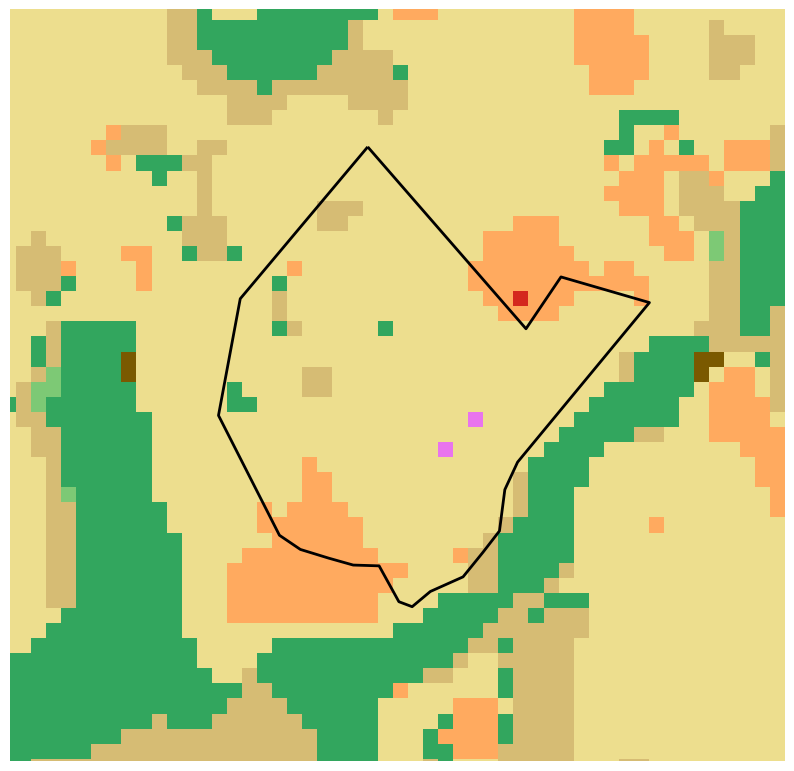

{1: 86.9757174392936, 2: 1.3245033112582782, 3: 0.44150110375275936, 11: 3.090507726269316, 15: 8.167770419426049}
data/result/classifica_planet_6yk9x_v2025v2.tif


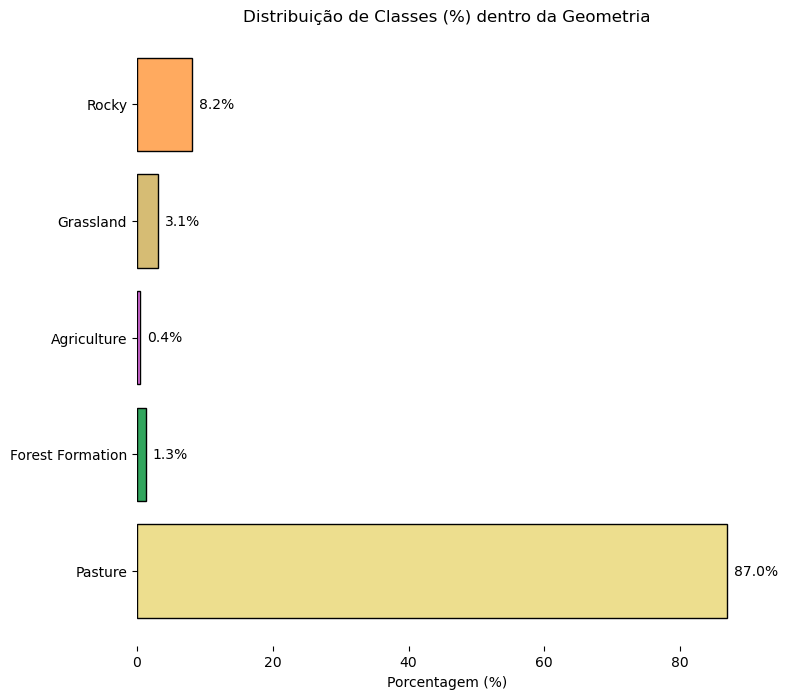

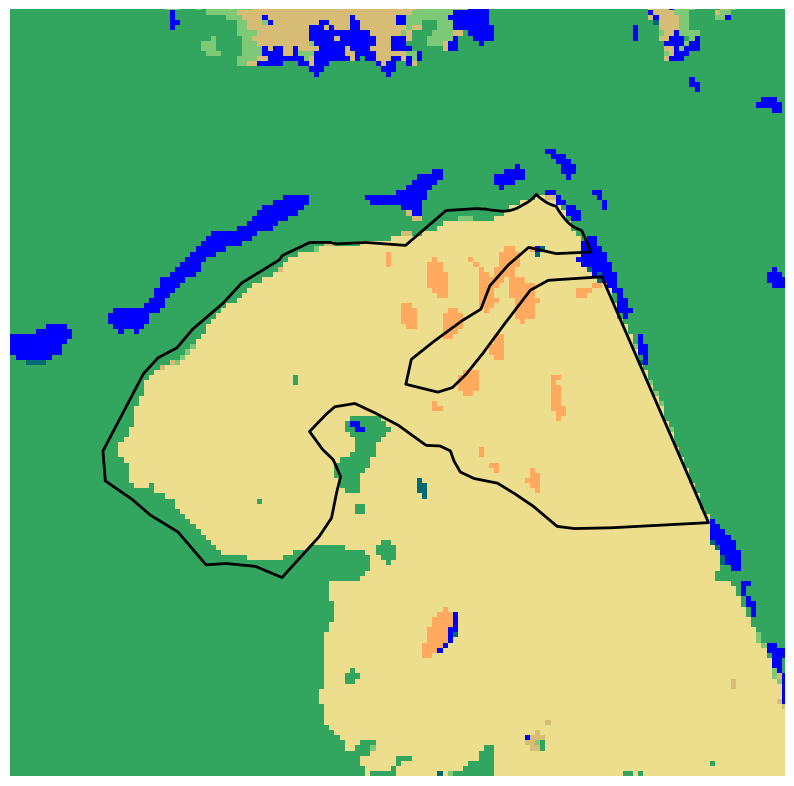

{1: 89.77076124567473, 2: 6.185121107266435, 7: 0.17301038062283738, 8: 0.08650519031141869, 9: 0.043252595155709346, 11: 0.10813148788927336, 15: 3.633217993079585}
data/result/classifica_planet_6yk9x_v2025v2.tif


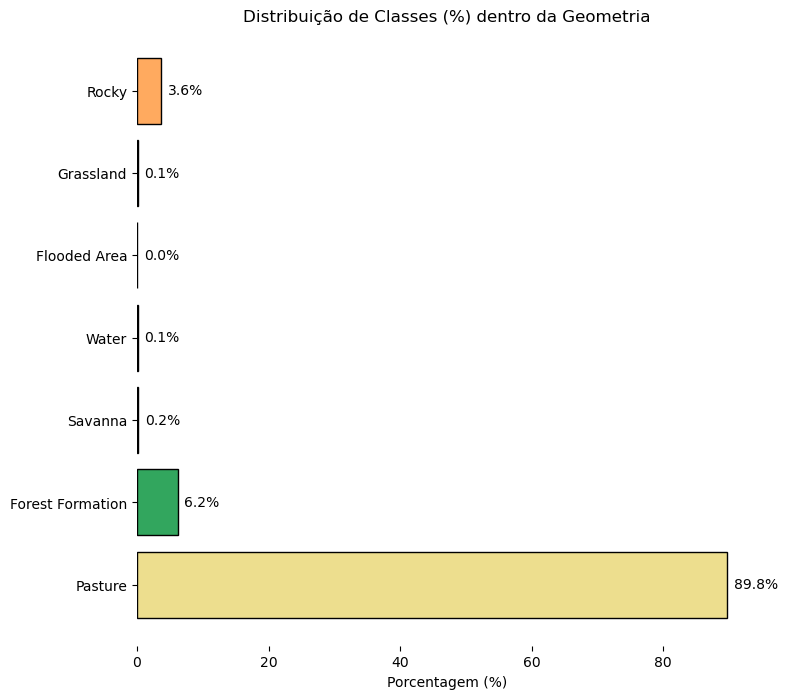

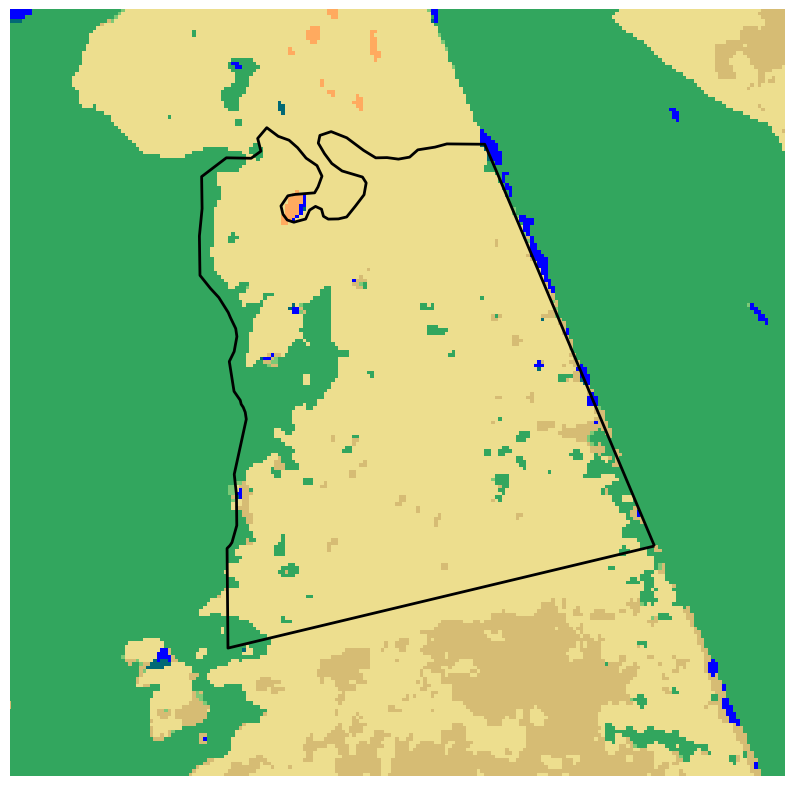

{1: 85.41750543522024, 2: 12.166841130525807, 7: 0.12883484982687815, 8: 0.21740880908285692, 9: 0.09662613737015863, 11: 1.9244705692889927, 15: 0.04831306868507931}
data/result/classifica_planet_6vx5g_v2025v2.tif


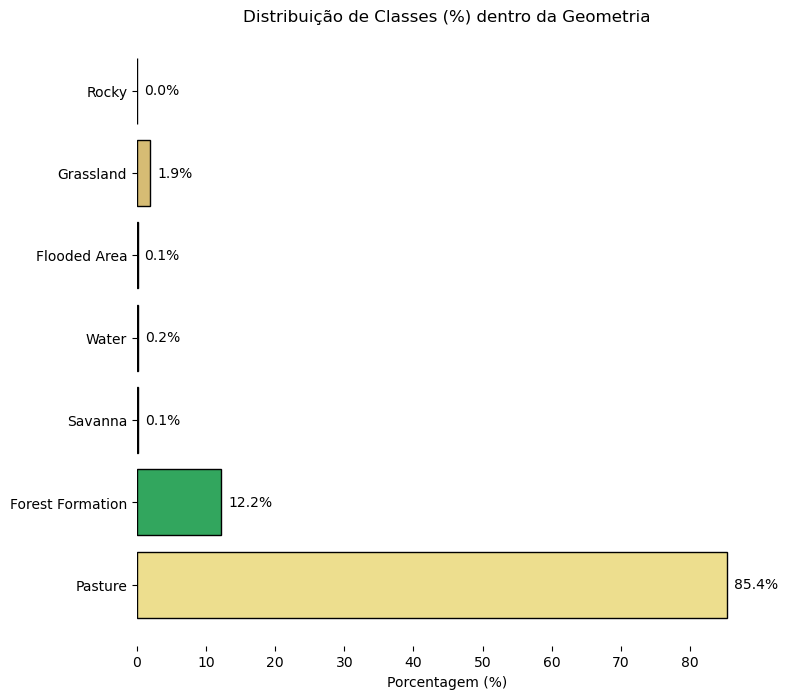

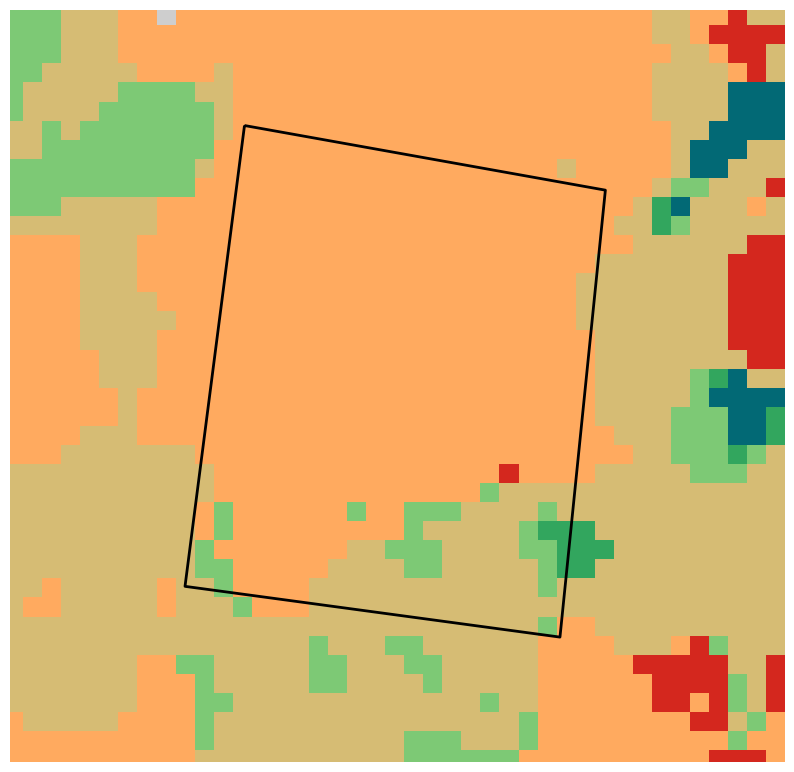

{2: 0.8565310492505354, 6: 0.21413276231263384, 7: 5.139186295503212, 11: 13.062098501070663, 15: 80.72805139186295}
data/result/classifica_planet_6yk9q_v2025v2.tif


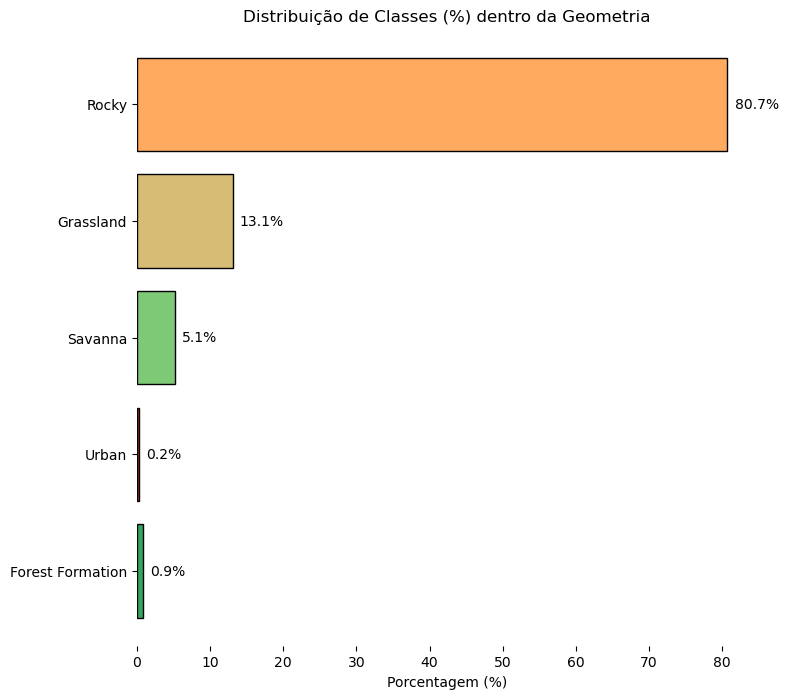

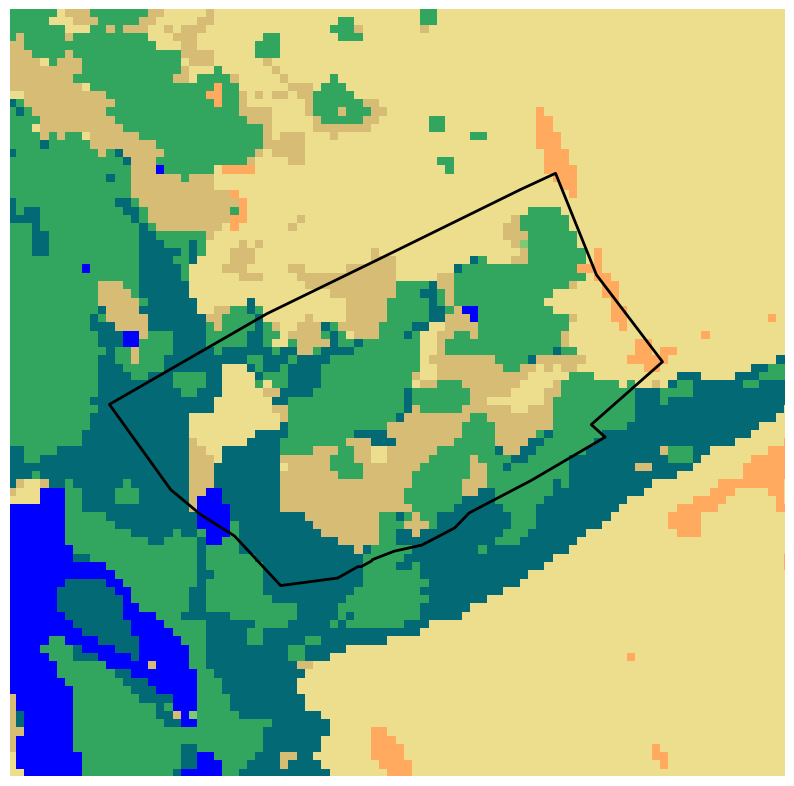

{1: 18.63738738738739, 2: 34.8536036036036, 7: 0.05630630630630631, 8: 0.9572072072072071, 9: 21.283783783783782, 11: 23.14189189189189, 15: 1.0698198198198199}
data/result/classifica_planet_6yk9q_v2025v2.tif


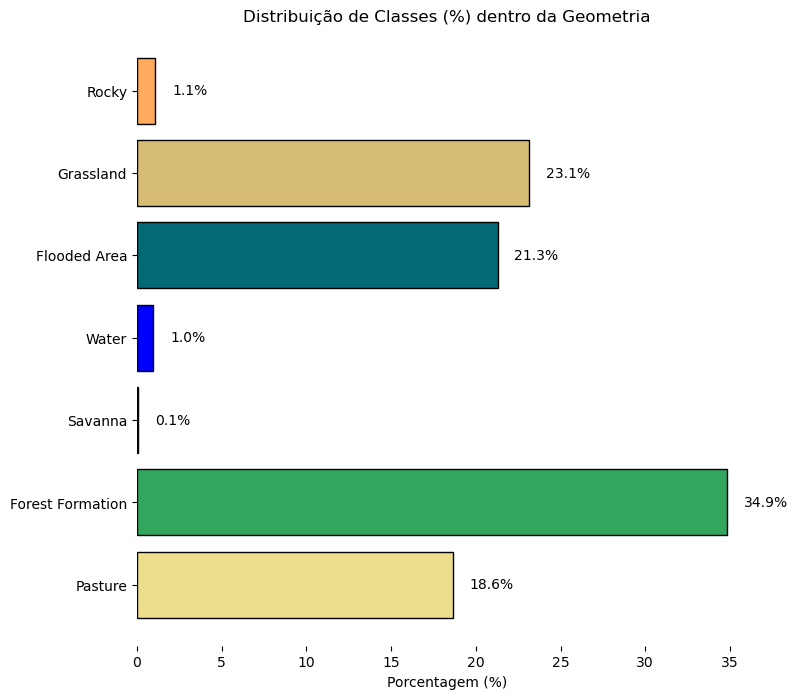

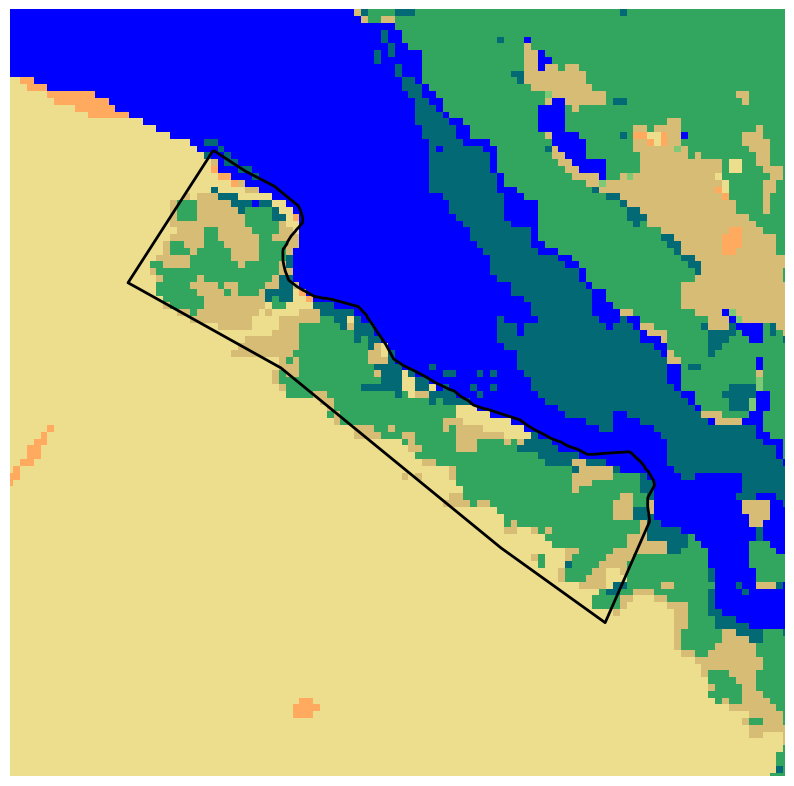

{1: 17.809187279151946, 2: 45.79505300353357, 8: 4.31095406360424, 9: 8.409893992932863, 11: 23.180212014134273, 15: 0.49469964664310956}
data/result/classifica_planet_6yk9q_v2025v2.tif


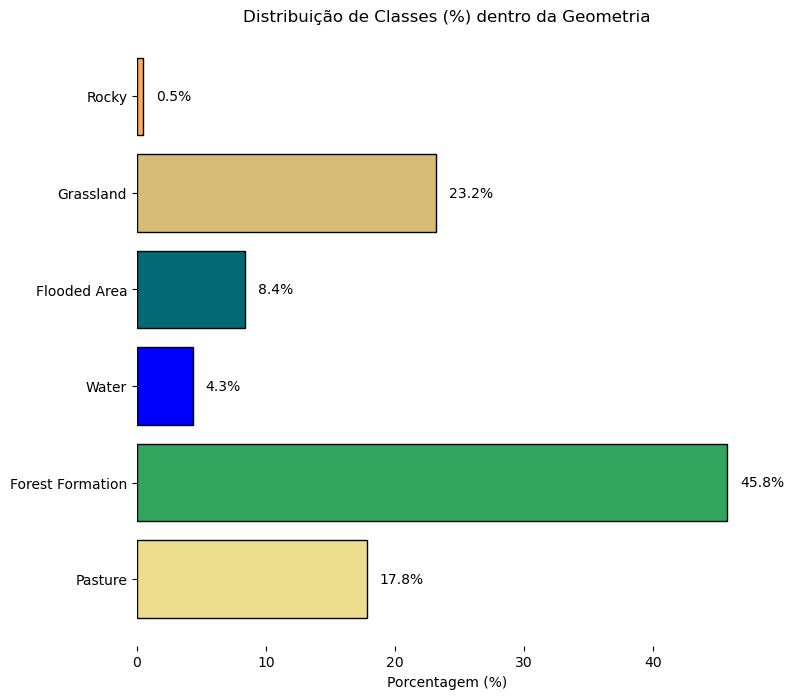

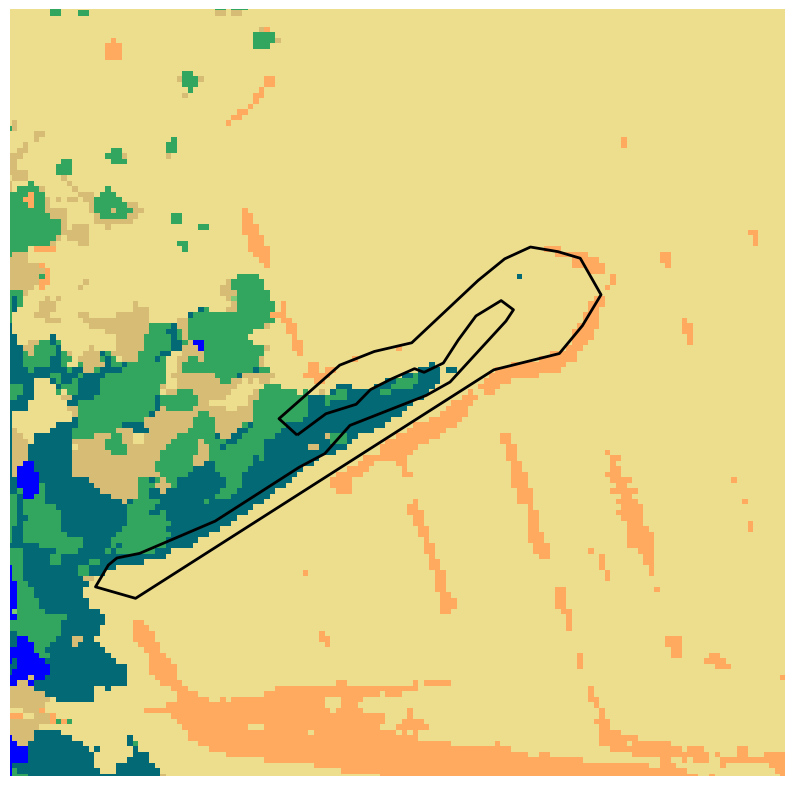

{1: 79.6137339055794, 2: 2.896995708154506, 9: 15.557939914163091, 11: 0.1072961373390558, 15: 1.8240343347639485}
data/result/classifica_planet_6yk9q_v2025v2.tif


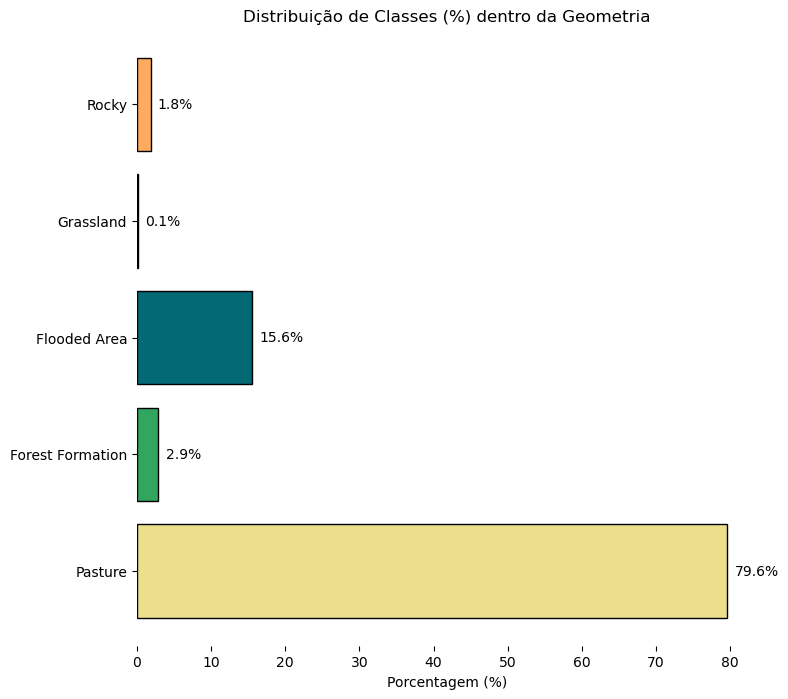

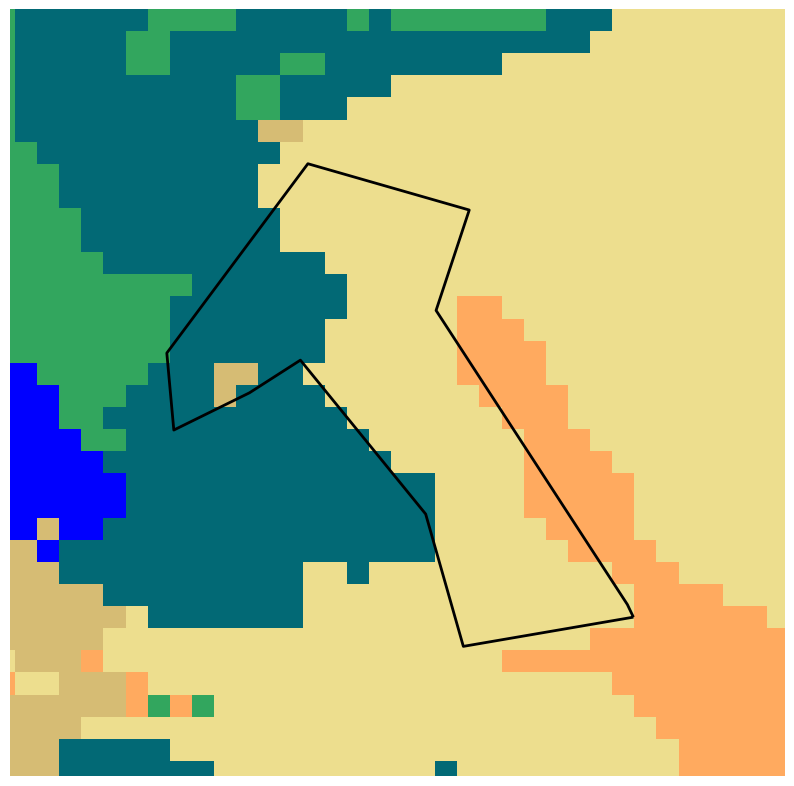

{1: 71.11111111111111, 9: 22.77777777777778, 11: 1.6666666666666667, 15: 4.444444444444445}
data/result/classifica_planet_6yk9q_v2025v2.tif


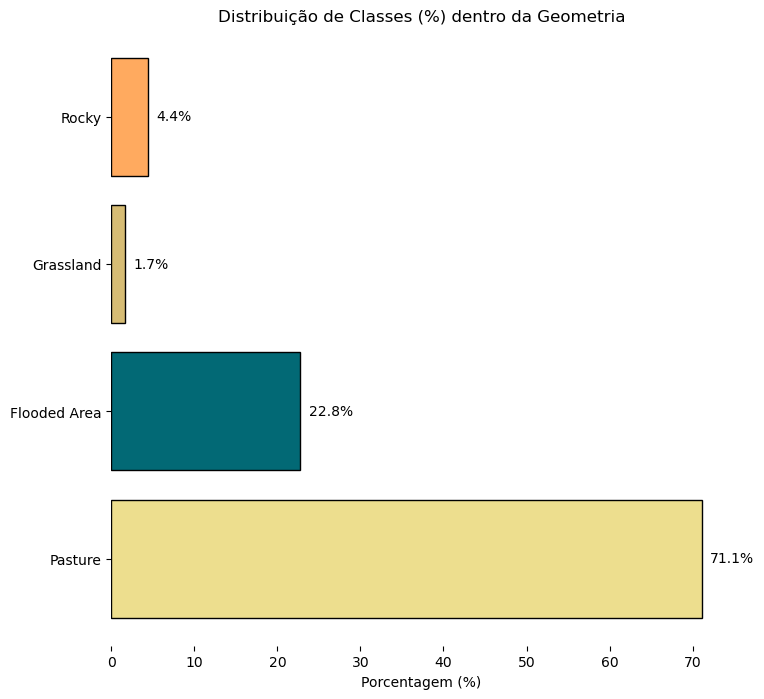

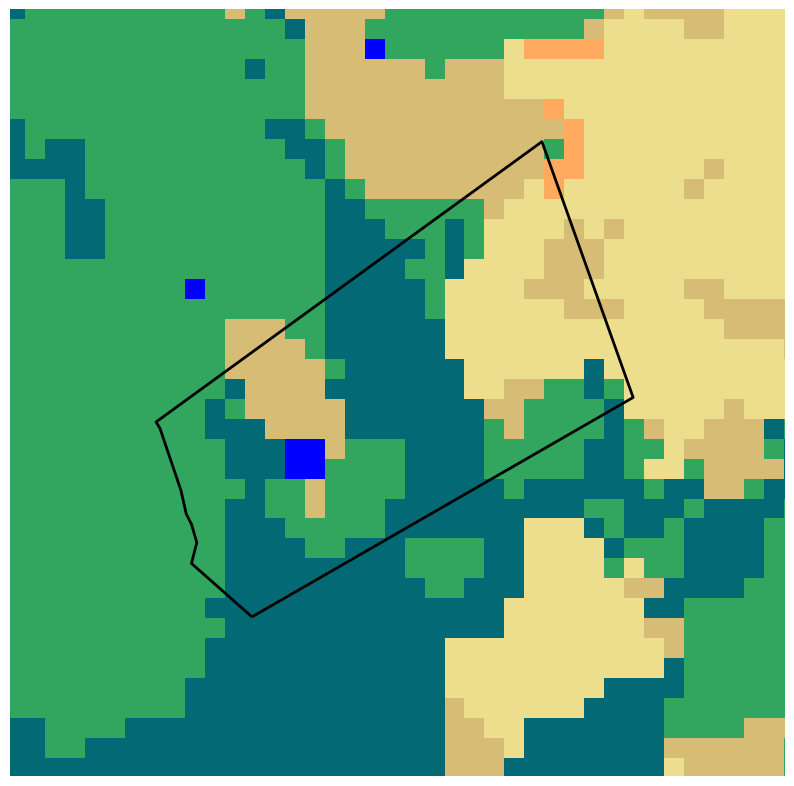

{1: 18.439716312056735, 2: 26.95035460992908, 8: 1.4184397163120568, 9: 37.5886524822695, 11: 15.24822695035461, 15: 0.3546099290780142}
data/result/classifica_planet_6yk7y_v2025v2.tif


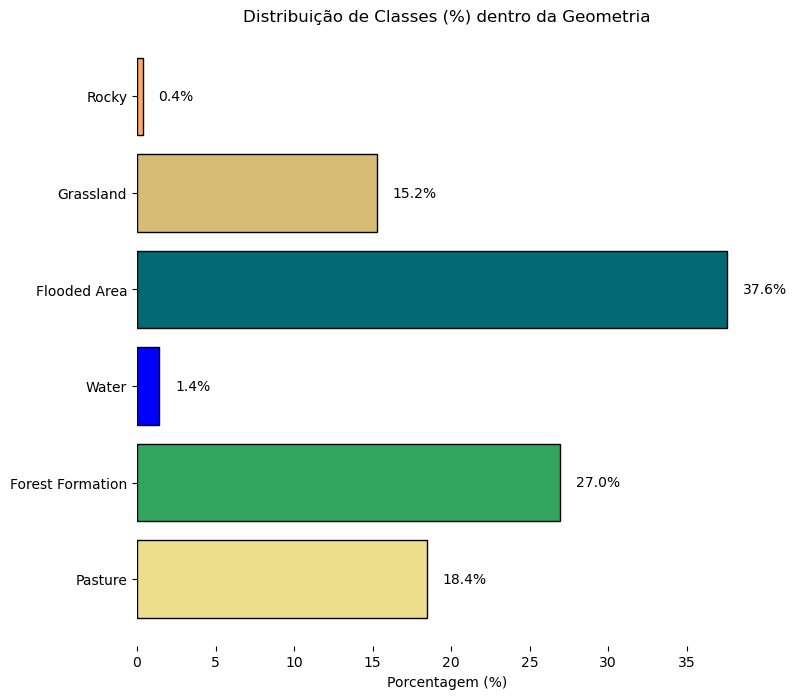

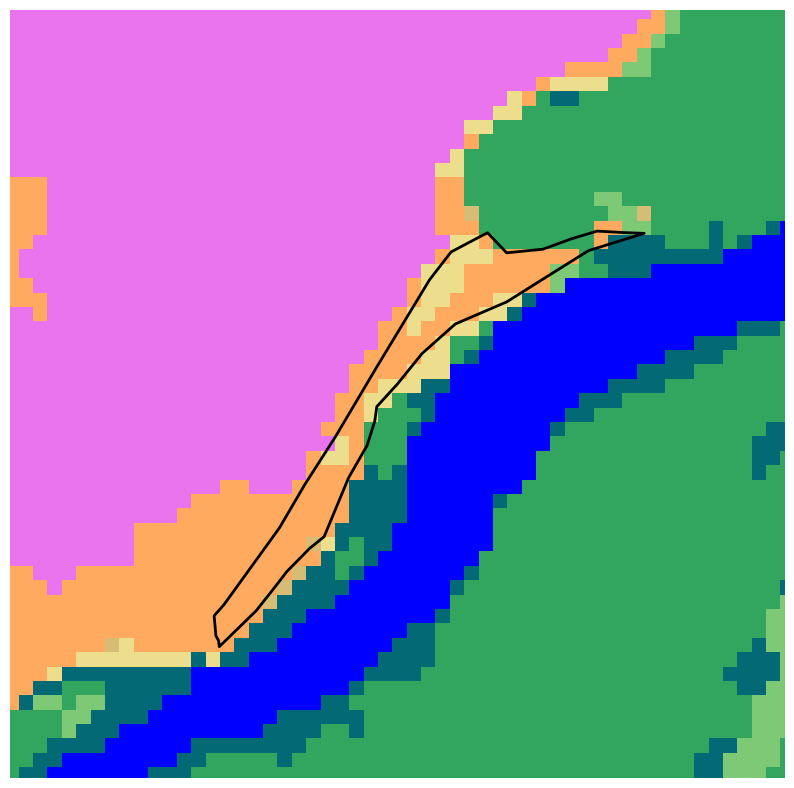

{1: 21.21212121212121, 2: 3.0303030303030303, 11: 1.0101010101010102, 15: 74.74747474747475}
data/result/classifica_planet_6gv7r_v2025v2.tif


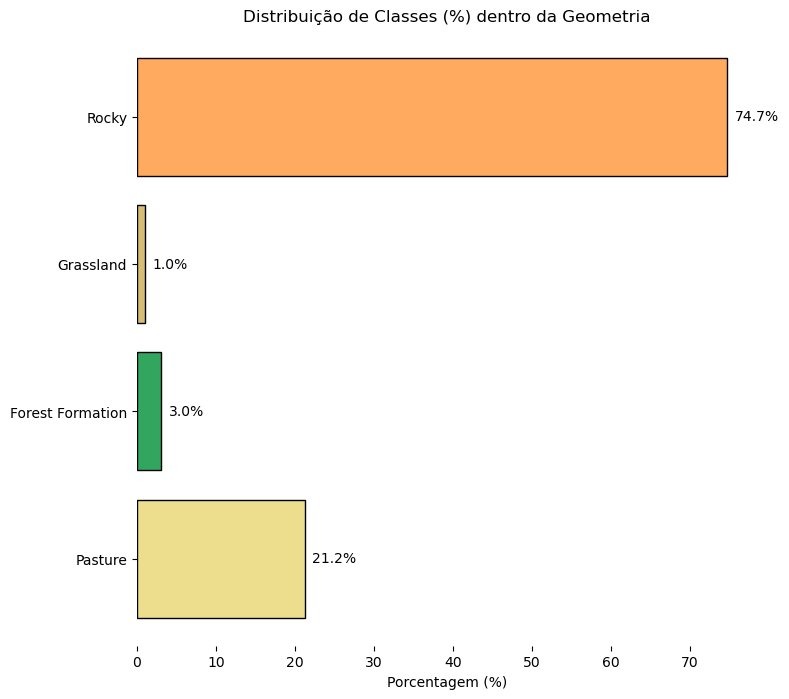

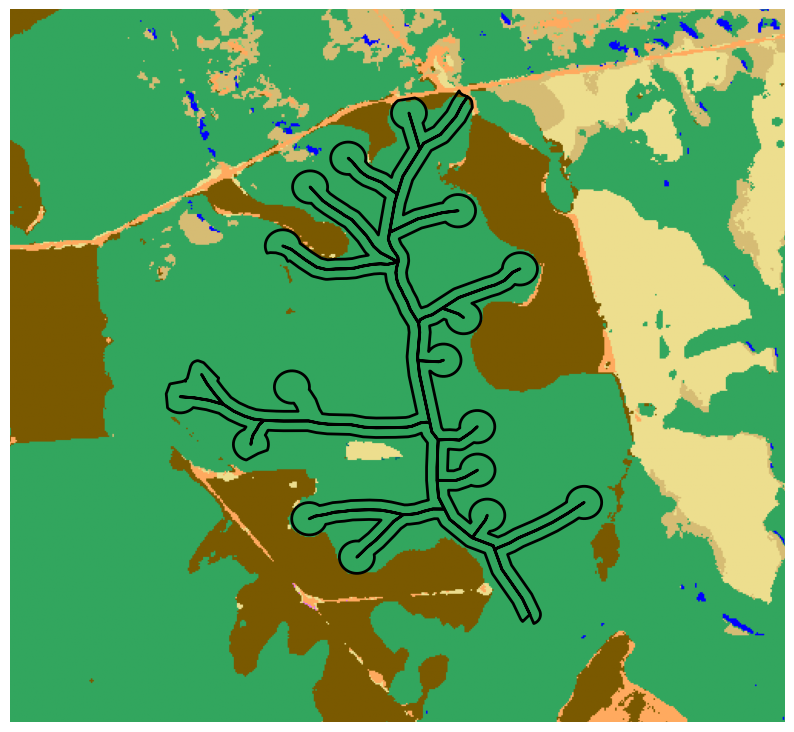

{1: 0.005346164127238706, 2: 99.72734562951082, 5: 0.21919272921678695, 11: 0.01603849238171612, 15: 0.03207698476343224}
data/result/classifica_planet_6gv7r_v2025v2.tif


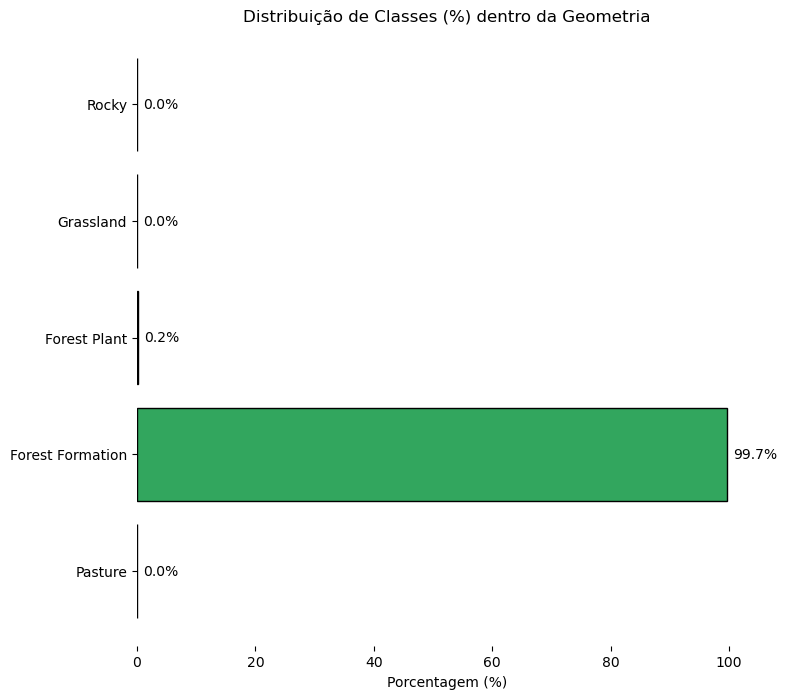

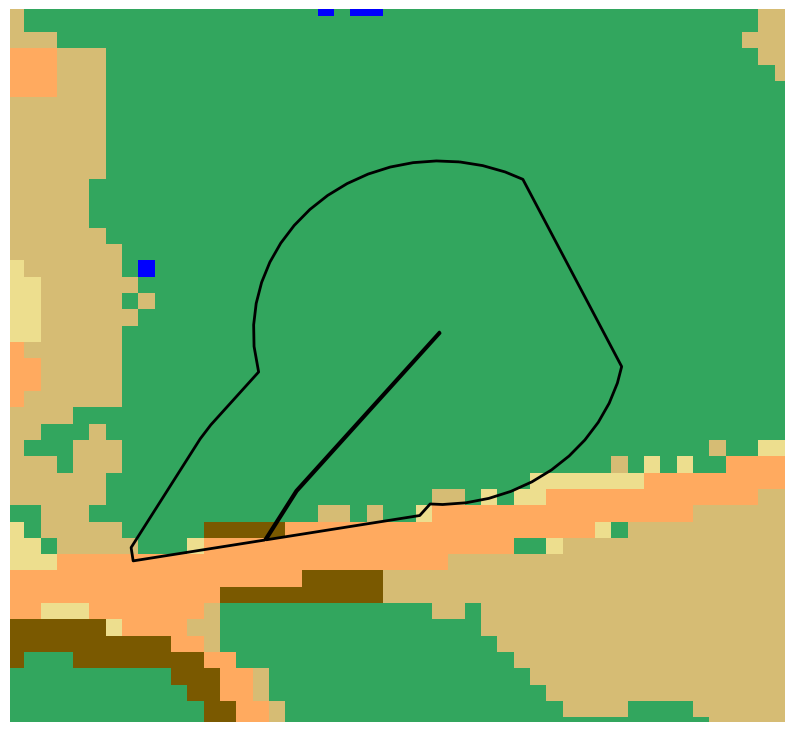

{1: 0.45558086560364464, 2: 96.35535307517085, 5: 1.1389521640091116, 11: 1.1389521640091116, 15: 0.9111617312072893}
data/result/classifica_planet_6gv7r_v2025v2.tif


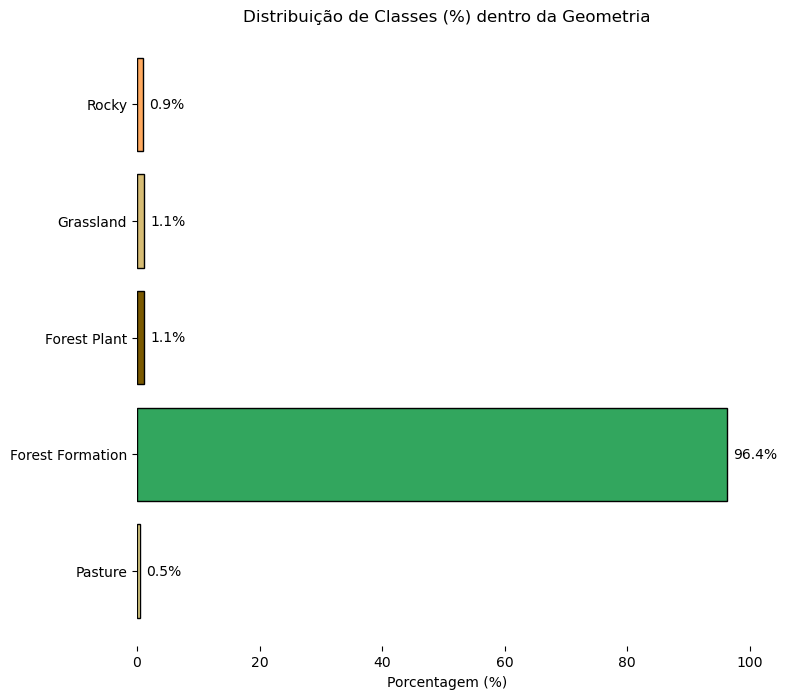

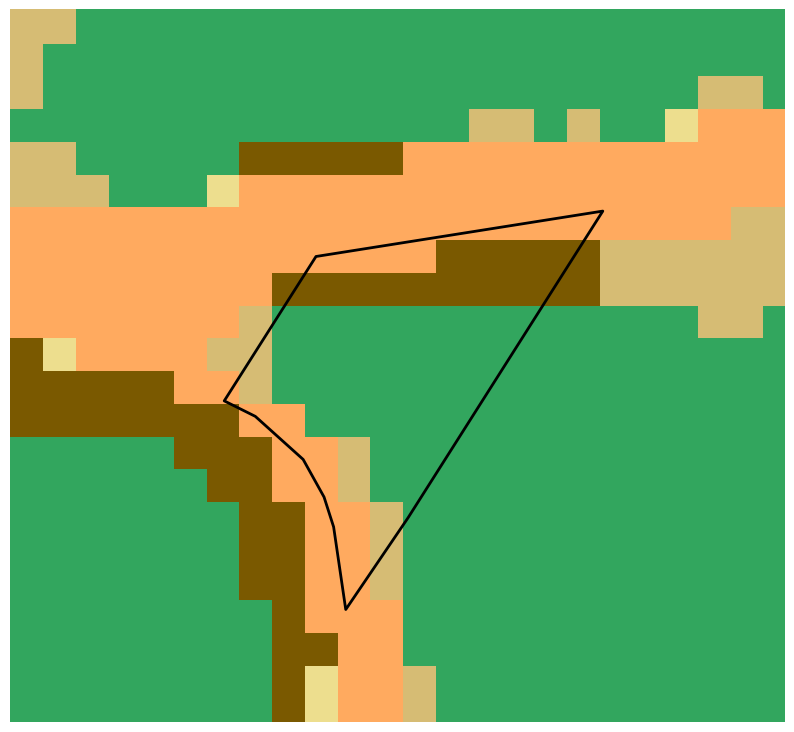

{2: 51.66666666666667, 5: 20.0, 11: 8.333333333333332, 15: 20.0}
data/result/classifica_planet_6gv7r_v2025v2.tif


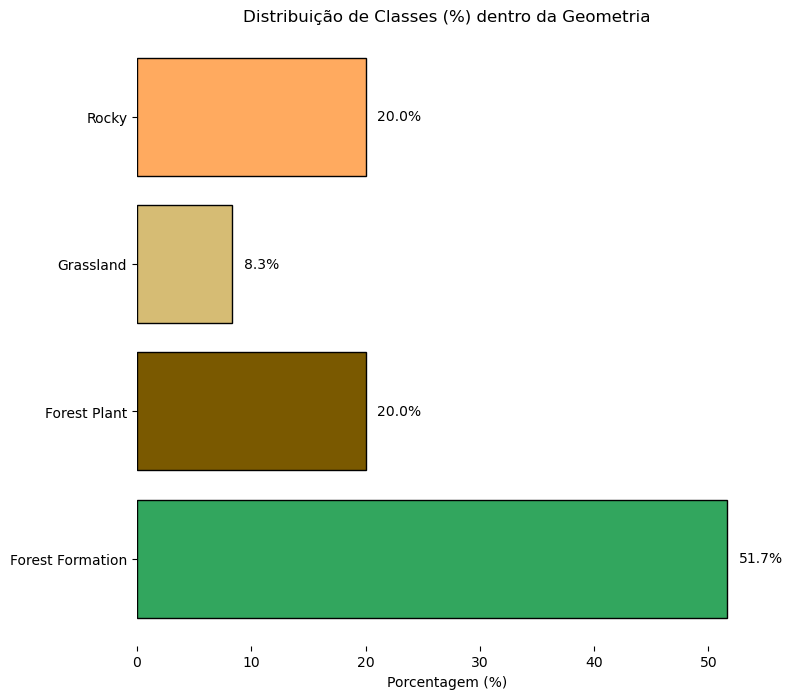

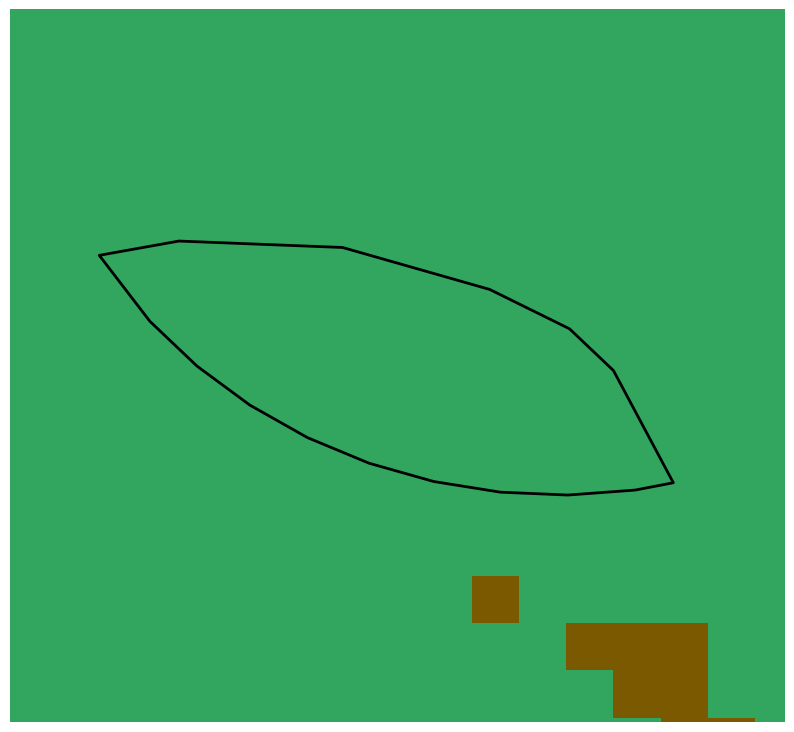

{2: 100.0}
data/result/classifica_planet_6gv7r_v2025v2.tif


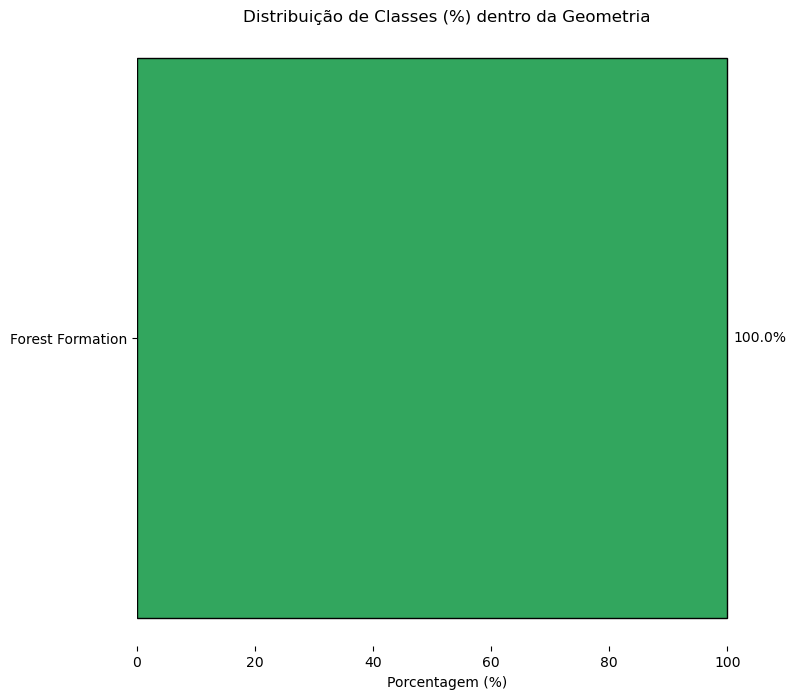

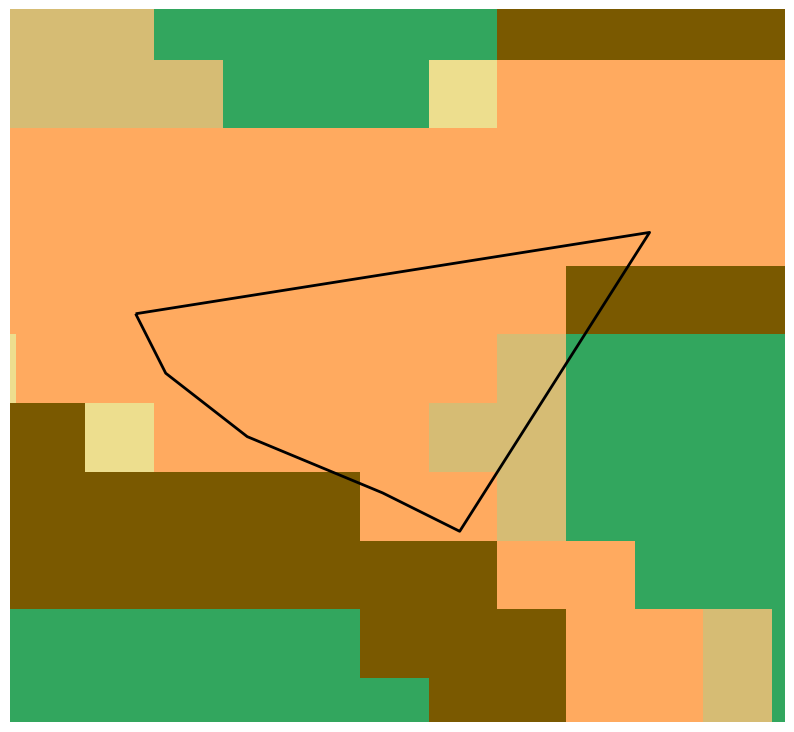

{5: 5.88235294117647, 11: 11.76470588235294, 15: 82.35294117647058}
data/result/classifica_planet_6gv7r_v2025v2.tif


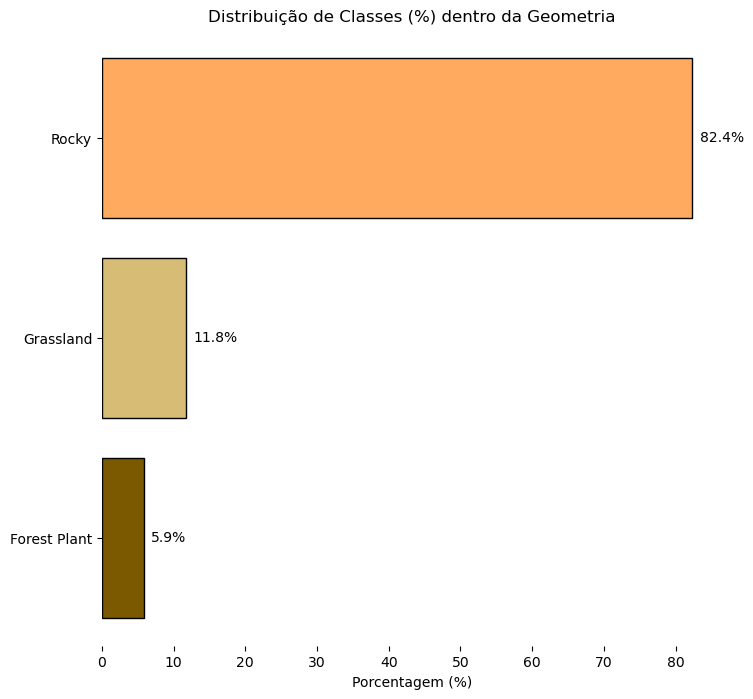

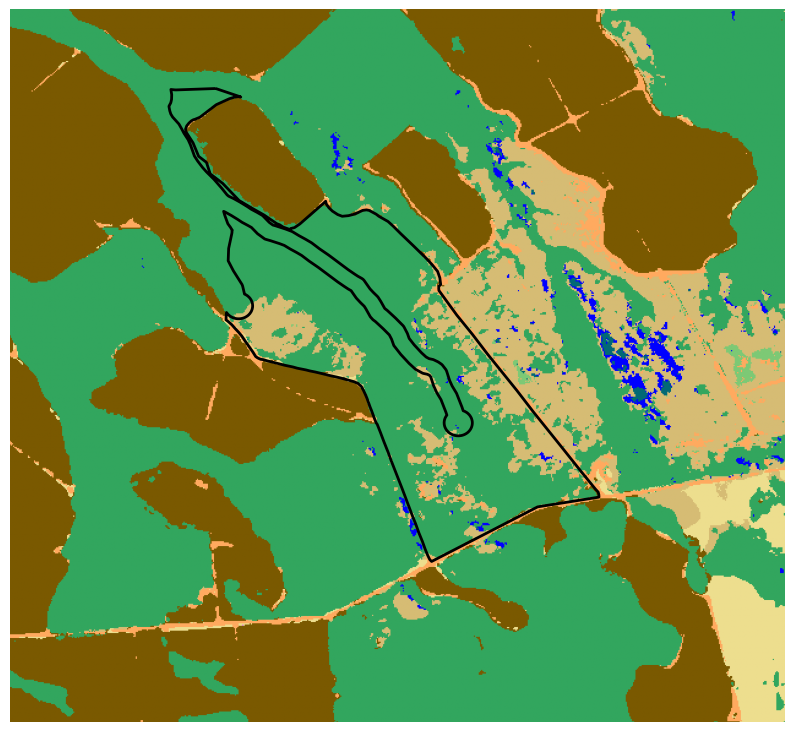

{1: 0.32056551043892817, 2: 76.20143569510658, 5: 0.40002191900926076, 7: 0.06849690393994191, 8: 0.41372129979724914, 9: 0.024658885418379087, 11: 20.869636692421505, 15: 1.7014630938681572}
data/result/classifica_planet_6gv7r_v2025v2.tif


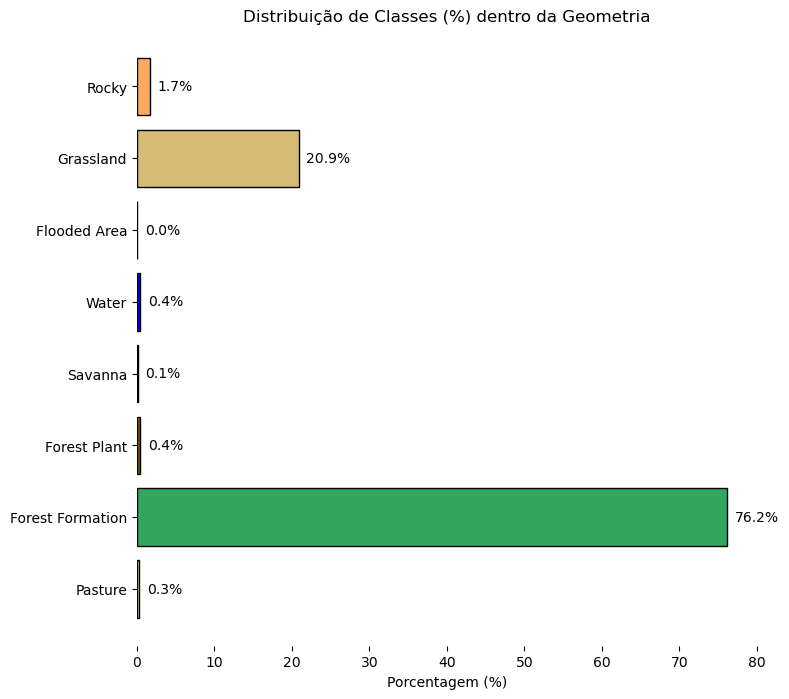

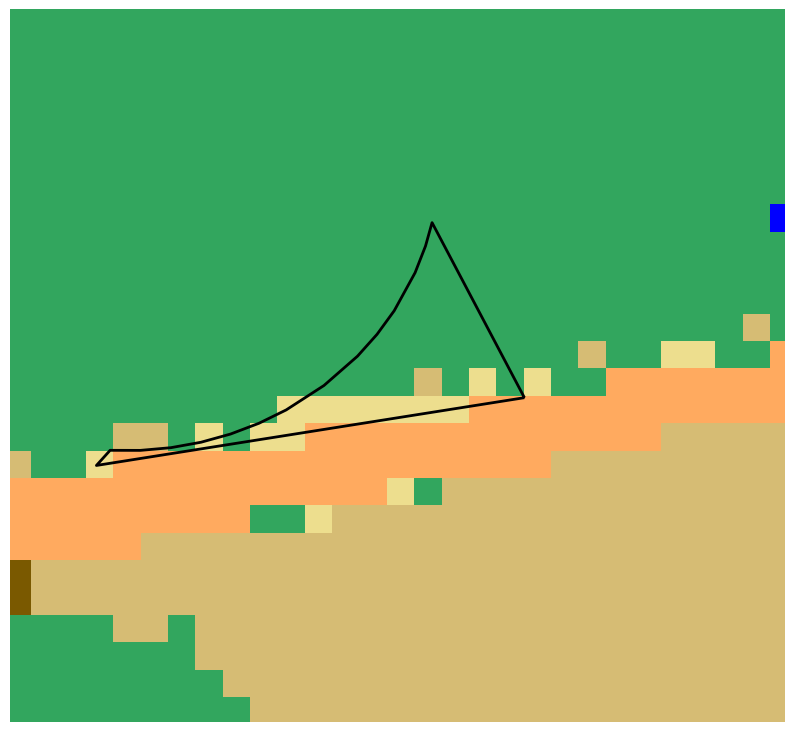

{1: 29.03225806451613, 2: 67.74193548387096, 11: 3.225806451612903}
data/result/classifica_planet_6gv7r_v2025v2.tif


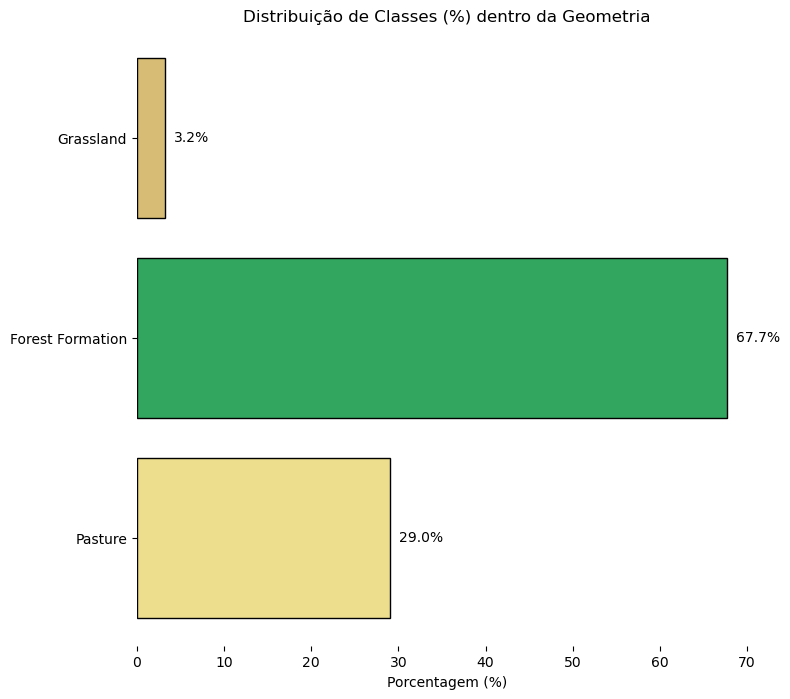

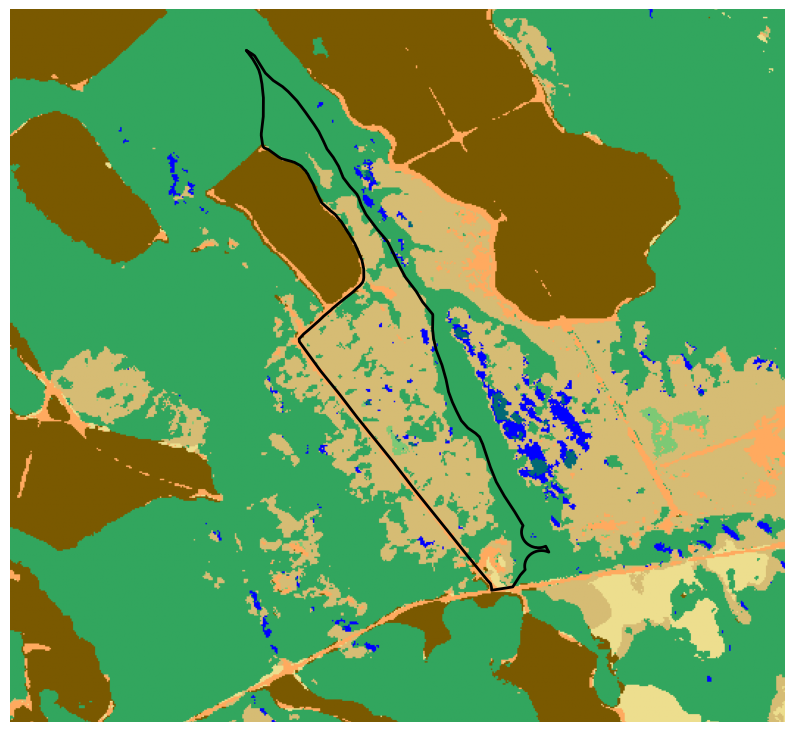

{1: 0.774777996304905, 2: 34.62065677334763, 5: 0.34567018296680374, 7: 0.8105369807497468, 8: 0.8105369807497468, 9: 0.23839322963227846, 11: 58.9904046725073, 15: 3.4090231837415814}
data/result/classifica_planet_6znc7_v2025v2.tif


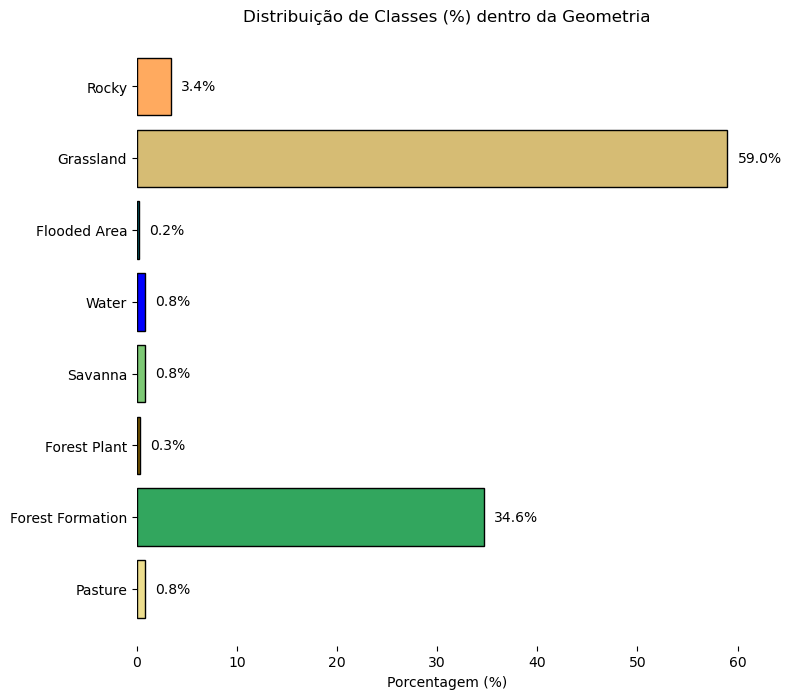

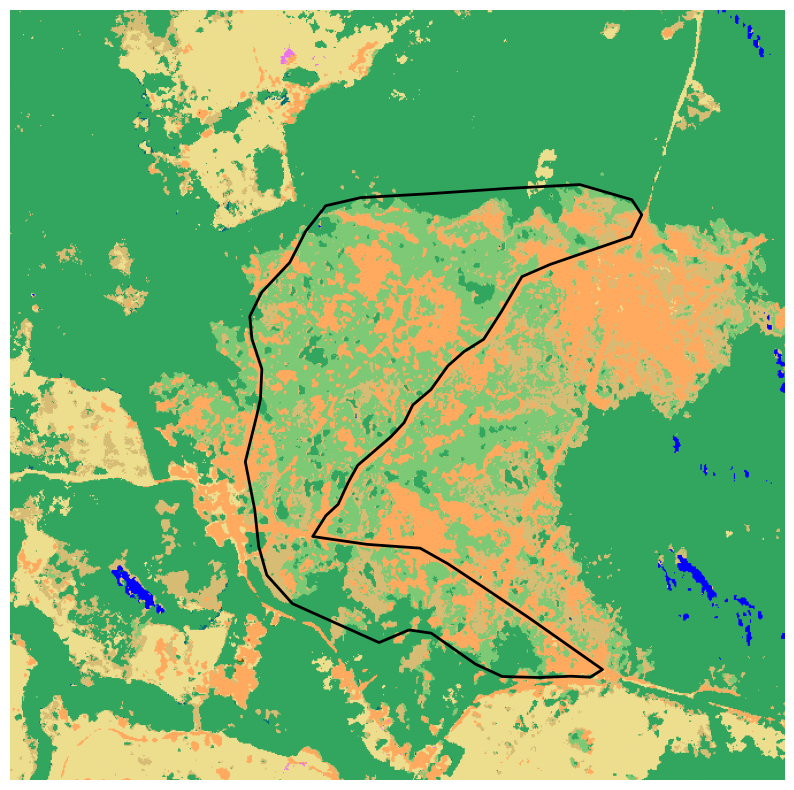

{1: 0.1460301698330875, 2: 15.990303596723082, 7: 44.04708012675419, 8: 0.010222111888316126, 9: 0.004380905094992626, 11: 13.742899282991866, 15: 26.05908380671447}
data/result/classifica_planet_6vqt8_v2025v2.tif


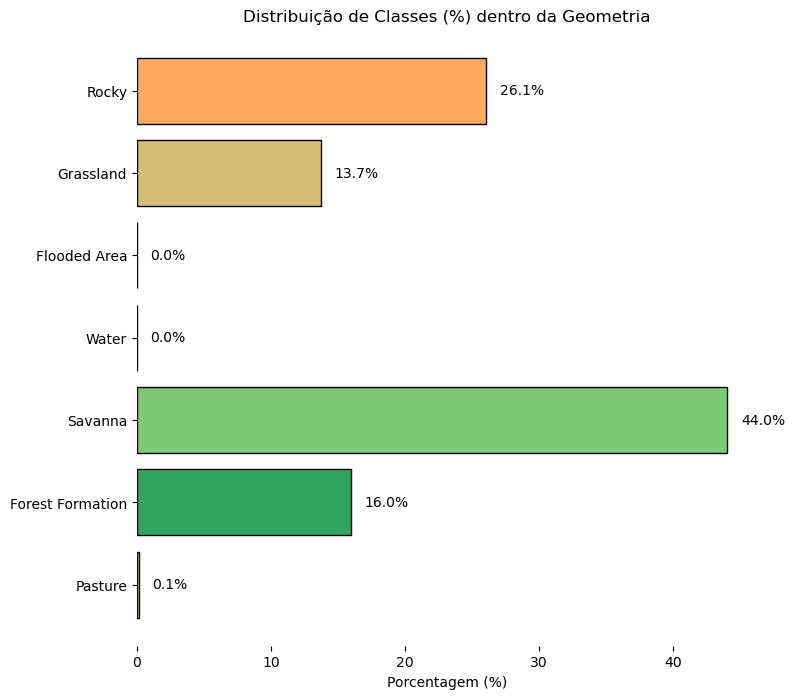

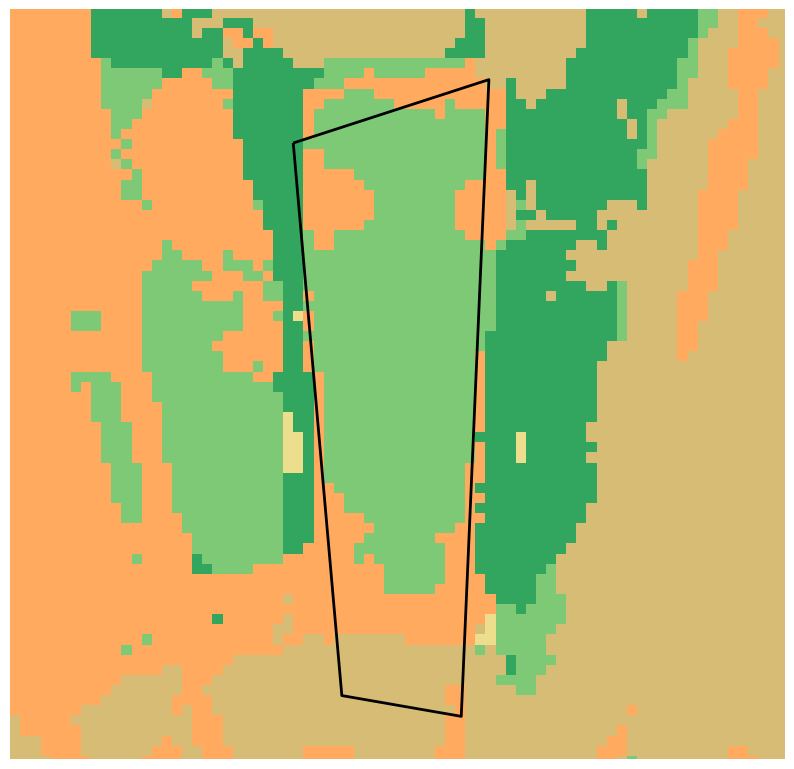

{2: 0.6514657980456027, 7: 68.83821932681867, 11: 8.469055374592834, 15: 22.041259500542886}
data/result/classifica_planet_6znc7_v2025v2.tif


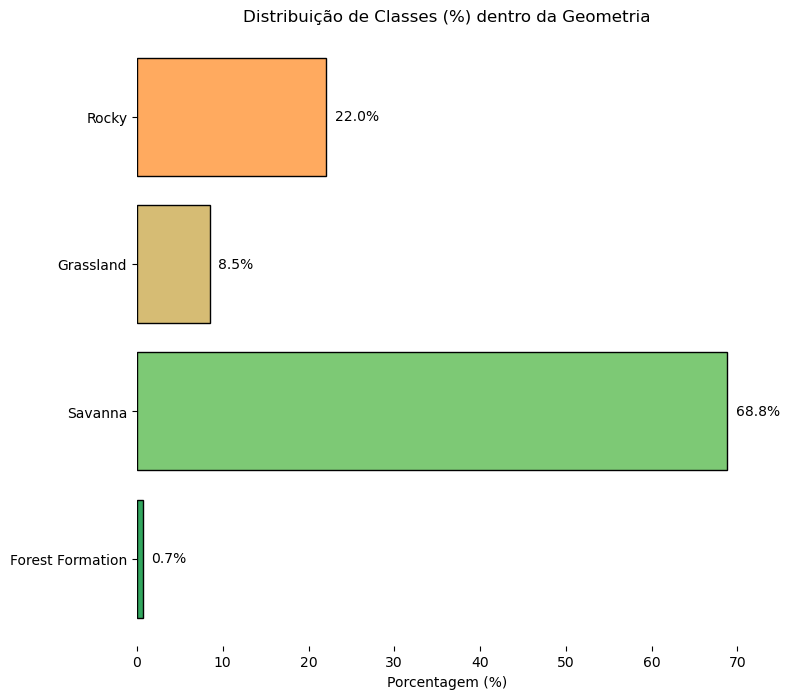

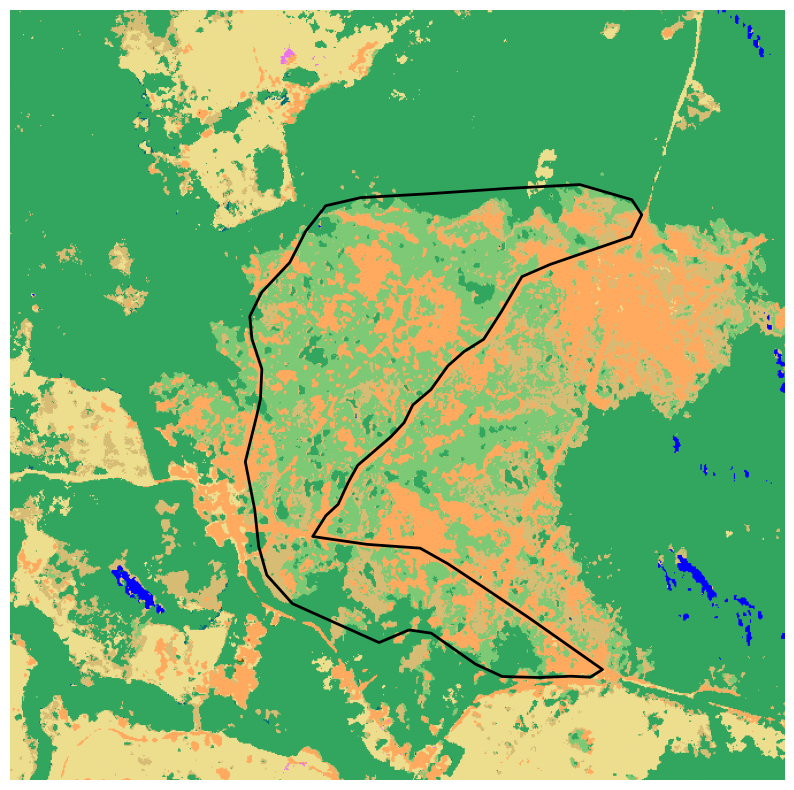

{1: 0.1460301698330875, 2: 15.990303596723082, 7: 44.04708012675419, 8: 0.010222111888316126, 9: 0.004380905094992626, 11: 13.742899282991866, 15: 26.05908380671447}
data/result/classifica_planet_6znc7_v2025v2.tif


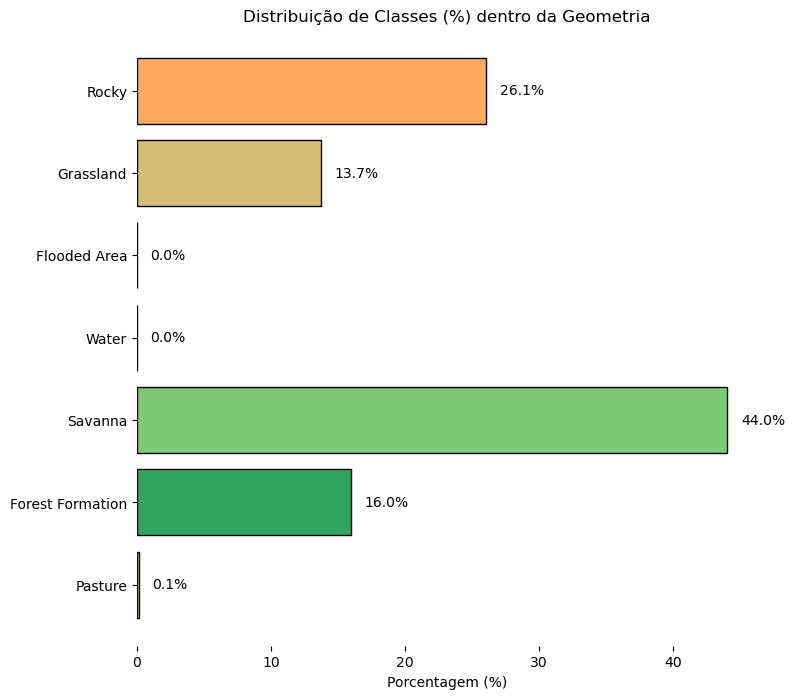

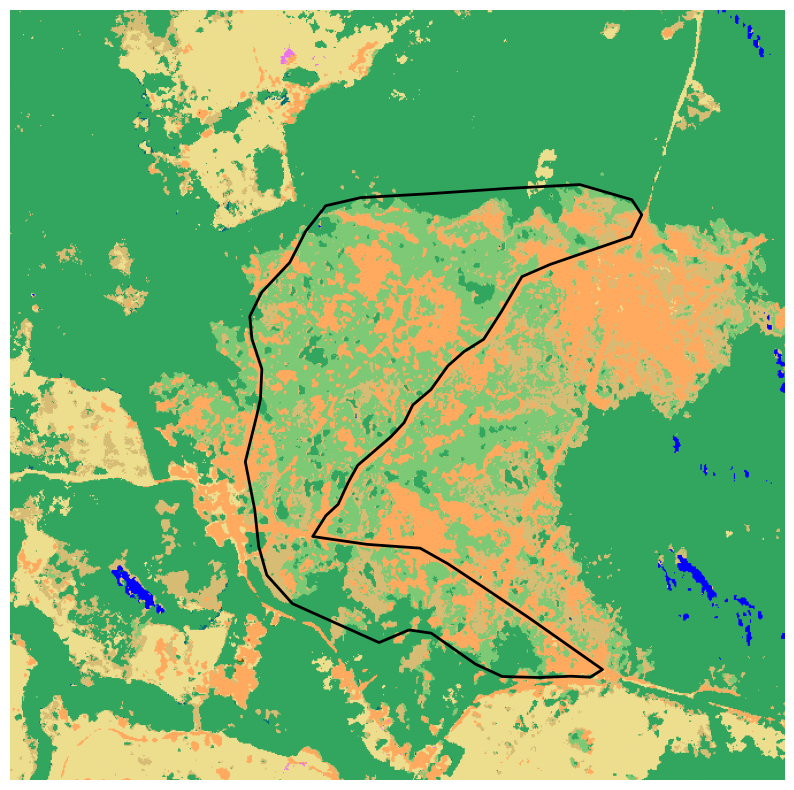

{1: 0.1460301698330875, 2: 15.990303596723082, 7: 44.04708012675419, 8: 0.010222111888316126, 9: 0.004380905094992626, 11: 13.742899282991866, 15: 26.05908380671447}


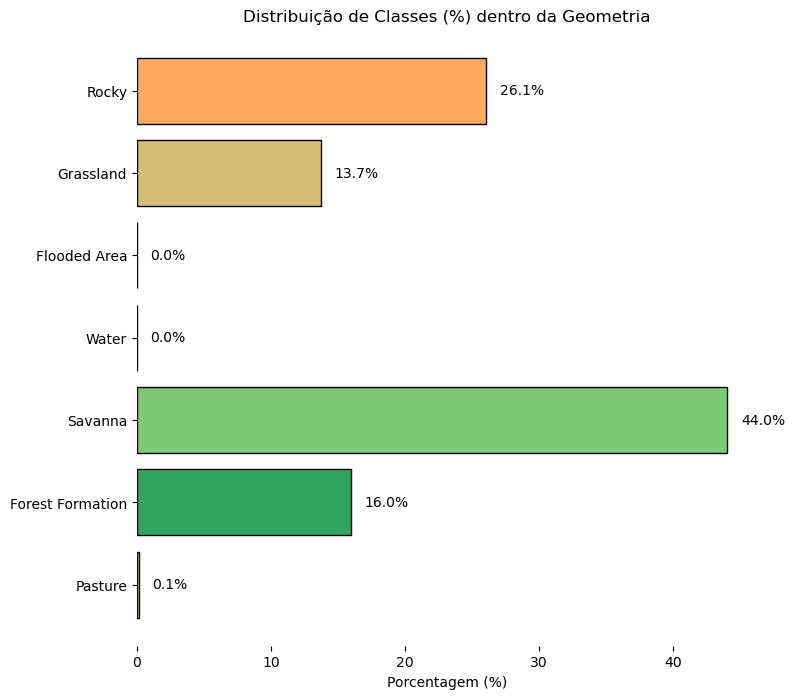

In [31]:
cmap = ListedColormap([
            '#EDDE8E',  # 1 PASTURE
            '#32A65E',  # 2 FOREST FORMATION
            '#E974ED',  # 3 AGRICULTURE
            '#FFFFB2',  # 4 AGROPEC
            '#7A5900',  # 5 FOREST PLANT
            '#D4271E',  # 6 URBAN
            '#7DC975',  # 7 SAVANNA
            '#0000FF',  # 8 WATER
            '#026975',  # 9 FLOODED AREA
            '#02D659',  # 10 WOODED SANDBANK
            '#D6BC74',  # 11 GRASSLAND
            '#D68FE2',  # 12 COFF
            '#04381D',  # 13 MANGROVE
            '#9C0027',  # 14 MINING
            '#FFAA5F',  # 15 ROCKY
            '#AD975A',  # 16 NON FOREST
            '#FC8114',  # 17 APICUM
            '#AD5100',  # 18 HERBACEOUS SANDBANK
            '#CECECE',  # 19 ASPHALT
        ])
bounds = np.arange(1, 21)  # Definir os limites das classes
norm = BoundaryNorm(bounds, cmap.N)

class_rows = []

for index in gdf['index'].unique():

    _gdf = gdf[gdf['index'] == index].copy().to_crs(5880)

    if False:
        fig1, (ax1,ax2) = plt.subplots(1,2,figsize=(10,20))

        fig2, (ax3,ax4) = plt.subplots(1,2,figsize=(10,20))

        fig3, ax5 = plt.subplots(1,figsize=(10,10))

        ano_destaque = get_year(_gdf['DataInici'].unique()[0])


        gdf.plot(ax=ax5,**{
                        'edgecolor': '#cecece',
                        'linewidth': 1,
                        'facecolor': 'none',
                    })


        xmin, ymin, xmax, ymax = buffer_centroide_bbox(_gdf).to_crs(5880).total_bounds
        for ax in (ax1,ax2,ax3,ax4, ax5):
            ax.axis('off')
            ax.set_aspect('equal')
            ax.set_xlim(xmin, xmax)
            ax.set_ylim(ymin, ymax)
            _gdf.plot(ax=ax,**{
                        'edgecolor': '#C7870B',
                        'linewidth': 2,
                        'facecolor': 'none',
                    })
        cx.add_basemap(ax1,source=get_planet(ano_destaque),crs=5880)
        cx.add_basemap(ax2,source=get_planet(2023),crs=5880)
        ax1.set_title(ano_destaque,fontsize=18)
        ax2.set_title(2023,fontsize=18)
        fig1.savefig(f'fig/{index:04}_planet.png', bbox_inches='tight', pad_inches=0, transparent=True)

        cx.add_basemap(ax3,source=get_mpb(ano_destaque),crs=5880)
        cx.add_basemap(ax4,source=get_mpb(2023),crs=5880)


        ax3.set_title(ano_destaque,fontsize=18)
        ax4.set_title(2023,fontsize=18)
        #fig1.ylabel('Plane Medres Visual',fontsize=18)
        #fig2.ylabel('MapBiomas',fontsize=18, labelpad=20)
        fig2.savefig(f'fig/{index:04}_mapbiomas.png', bbox_inches='tight', pad_inches=0, transparent=True)

        c4x.add_basemap(ax5,source='http://mt0.google.com/vt/lyrs=s&hl=en&x={x}&y={y}&z={z}',crs=5880)
        fig3.savefig(f'fig/{index:04}_referencia.png', bbox_inches='tight', pad_inches=0, transparent=True)
        
    else:
        p = _gdf.centroid.to_crs(4326).iloc[0]
        _hash = geohash.encode(p.y,p.x,5)
        try:
            tif_path = glob(f'data/result/classifica_planet_{_hash}_v2025v2.tif')[0]
        except:
            tif_path = glob(f'data/result/classifica_planet_{_hash[:4]}*_v2025v2.tif')[0]
            
        print(tif_path)
        with rasterio.open(tif_path) as src:
            fig4, ax6 = plt.subplots(1,figsize=(10,10))
            crs = src.crs
            
            
            xmin, ymin, xmax, ymax = buffer_centroide_bbox(_gdf.to_crs(crs), 1).to_crs(crs).total_bounds
            
            ax6.axis('off')
            ax6.set_aspect('equal')
            ax6.set_xlim(xmin, xmax)
            ax6.set_ylim(ymin, ymax)
            _gdf.to_crs(crs).plot(ax=ax6,**{
                            'edgecolor': 'black',
                            'linewidth': 2,
                            'facecolor': 'none',
                        })
            show(src, cmap=cmap, vmin=1, vmax=19)
            out_image, out_transform = mask(src, _gdf.to_crs(crs).geometry, crop=True)
            raster_cortado = out_image[0]  # Apenas a primeira banda

            # Resolução do pixel (tamanho de um pixel em metros)
            pixel_size_x, pixel_size_y = src.res
            pixel_area = abs(pixel_size_x * pixel_size_y)  # Área de um pixel

            # Contar a quantidade de pixels por classe
            valores, contagens = np.unique(raster_cortado, return_counts=True)
            classe_pixel = {int(val): count for val, count in zip(valores, contagens) if val != 0}
            porcentagem_classes = None
            # Calcular porcentagem
            total_pixels_validos = sum(classe_pixel.values())
            porcentagem_classes = {classe: (count / total_pixels_validos) * 100 for classe, count in classe_pixel.items()}
            print(porcentagem_classes)
                #cx.add_basemap(ax4,source='https://earthengine.googleapis.com/v1/projects/geocodelabs-jairo/maps/c7c9d06b1fe7a0134715046ca2645b4f-2ae3b1e41e89ca7523122aed97ca4091/tiles/{z}/{x}/{y}',crs=5880)
            fig4.savefig(f'fig/{index:04}_class.png', bbox_inches='tight', pad_inches=0, transparent=True)
           
            
            fig5,ax7 = plt.subplots(figsize=(8, 8))
            
            labels = [get_class_info(classe)[1] for classe in porcentagem_classes.keys()]
            sizes = list(porcentagem_classes.values())
            colors = [get_class_info(classe)[0] for classe in porcentagem_classes.keys()]
            
            
            antropico = [value for classe, value  in porcentagem_classes.items() if  get_class_info(classe)[2] == 2 ]
            
            tropico = [value for classe, value  in porcentagem_classes.items() if  get_class_info(classe)[2] == 1 ]
            
            
            
            class_rows.append({
                'index':index,
                'natural':sum(tropico),
                'antropico':sum(antropico)
            })
            

            bars = ax7.barh(labels, sizes, color=colors, edgecolor='black')
            
            
            

            # Adicionar valores % na frente das barras
            for bar in bars:
                width = bar.get_width()
                ax7.text(
                    width + 1,  # Um pequeno offset para o lado direito
                    bar.get_y() + bar.get_height() / 2,  # Posicionar no meio da barra
                    f"{width:.1f}%",  # Adicionar o valor percentual formatado
                    va='center',  # Alinhar verticalmente ao centro da barra
                    ha='left',    # Alinhar horizontalmente à esquerda
                    fontsize=10
                )

            # Adicionar título e rótulos
            ax7.set_xlabel("Porcentagem (%)")
            # Remover a borda do gráfico
            for spine in ax7.spines.values():
                spine.set_visible(False)
            ax7.set_title("Distribuição de Classes (%) dentro da Geometria")
            fig5.savefig(f'fig/{index:04}_class_plot.png', bbox_inches='tight', pad_inches=0, transparent=True)
        
        
        
        


In [32]:
class_rows

[{'index': 0, 'natural': 4.415011037527594, 'antropico': 95.58498896247241},
 {'index': 1, 'natural': 6.596020761245675, 'antropico': 93.40397923875432},
 {'index': 2, 'natural': 14.534181496094693, 'antropico': 85.46581850390531},
 {'index': 3, 'natural': 19.05781584582441, 'antropico': 80.94218415417558},
 {'index': 4, 'natural': 80.29279279279278, 'antropico': 19.707207207207208},
 {'index': 5, 'natural': 81.69611307420494, 'antropico': 18.303886925795055},
 {'index': 6, 'natural': 18.562231759656655, 'antropico': 81.43776824034335},
 {'index': 7, 'natural': 24.444444444444446, 'antropico': 75.55555555555556},
 {'index': 8, 'natural': 81.20567375886525, 'antropico': 18.794326241134748},
 {'index': 9, 'natural': 4.040404040404041, 'antropico': 95.95959595959596},
 {'index': 10, 'natural': 99.74338412189253, 'antropico': 0.2566158781074579},
 {'index': 11, 'natural': 97.49430523917997, 'antropico': 2.5056947608200453},
 {'index': 12, 'natural': 60.0, 'antropico': 40.0},
 {'index': 13,

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


def plot_bar(index):

    _df = df[df['index'] == index].copy()
    _df['color'] = _df['class_id'].apply(get_color)
    _df['name'] = _df['class_id'].apply(get_name)


    ano_destaque = get_year(_df['DataInici'].unique()[0])
    print(year)
    # Cria um dicionário de cores:  class_id -> cor
    color_dict = dict(zip(_df['class_id'], _df['color']))

    df_pivot = _df.pivot_table(index='class_year', columns='class_id', values='class_por', fill_value=0)
    #   index='class_year':  O ano será o índice (eixo x do gráfico).
    #   columns='class_id': Cada class_id será uma coluna (uma subcategoria no gráfico empilhado).
    #   values='class_por':  Os valores de class_por serão os valores das barras.
    #   fill_value=0: Preenche valores ausentes com 0 (importante para anos sem dados para alguma class_id).

    # Cria o gráfico de barras empilhadas
    df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), color=color_dict)
    # --- Personalizações da Legenda (usando os nomes) ---
    handles, labels = plt.gca().get_legend_handles_labels()  # Pega os handles e labels atuais
    name_dict = dict(zip(_df['class_id'], _df['name']))
    new_labels = [name_dict[int(label)] for label in labels]

    xticks = plt.gca().get_xticklabels()
    for tick in xticks:
        if tick.get_text() == str(ano_destaque):
            tick.set_weight('bold')


    plt.title('Distribuição de Porcentagens de classe de uso do solo')
    plt.xlabel('Ano')
    plt.ylabel('Porcentagem')
    plt.legend(handles, new_labels, title='',
               loc='upper center',  #  Começa no centro superior...
               bbox_to_anchor=(0.5, -0.15),  # ...e move para baixo (ajuste o -0.15 conforme necessário)
               ncol=6,  # Número de colunas na legenda
               frameon=False) 
    plt.xticks(rotation=90)#, ha="right")
    plt.tight_layout()
    plt.savefig(f'fig/{index:04}_barplot.png', bbox_inches='tight', pad_inches=0, transparent=True)

for i in range(0,20):
    plot_bar(i)

In [ ]:
# Cria o gráfico de barras empilhadas com Seaborn
sns.barplot(x='class_id', y='class_year', data=_df_melted,  # Usa o DataFrame "melted"
            dodge=False)  # dodge=False faz o empilhamento! Importante.

# Personalizações (opcional)
plt.title('Gráfico de Barras Empilhadas (Seaborn)')
plt.xlabel('Categorias')
plt.ylabel('Valores')
plt.legend(title='Subcategorias')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()